# Table of Contents: <a class="anchor" id="contents"></a>

## [Required User Input: Path for Plots and Charts](#requiredinput)

* [Importing and Cleaning Data](#import)
* [Function Definitions](#funcdef)
    * [Recursive Feature Elimination (RFE) with Features and Target](#rfe)
    * [Cross Validated ROC Chart](#cvroc)
* [Target: HNHC](#hnhc)
    * [Logistic Regression RFE - HNHC](#lrhnhc)
    * [Logistic Regression RFE - HNHC without 'los'](#lrhnhcwolos)
    * [Decision Tree Classifier RFE - HNHC](#dtchnhc)
    * [Decision Tree Classifier RFE - HNHC without 'los'](#dtchnhcwolos)
    * [XGBoost Classifier RFE - HNHC](#xgbchnhc)
    * [XGBoost Classifier RFE - HNHC without 'los'](#xgbchnhcwolos)
* [Target: READM_NINETY_DAYS](#ninety)
    * [Logistic Regression RFE - READM_NINETY_DAYS](#lrninety)
    * [Decision Tree Classifier RFE - READM_NINETY_DAYS](#dtcninety)
    * [XGBoost Classifier RFE - READM_NINETY_DAYS](#xgbcninety)

## Importing and cleaning data <a class="anchor" id="import"></a>

[Return to Table of Contents](#contents)

In [1]:
# Import dependencies.
from sklearn import tree, metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import roc_curve, plot_roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from numpy import interp
import os
from os import path
import getpass
import warnings
import dask.dataframe as dd
from IPython.display import display 
from tqdm.auto import tqdm
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

# Required User Input: Path for Plots and Charts <a class="anchor" id="requiredinput"></a>

[Return to Table of Contents](#contents)

In [2]:
# Get the current user's computer name.
pc_name = getpass.getuser()

#############################
'''SET PATH TO SAVE IMAGES'''
#############################
# Set 'PATH' as the path to where any plots/charts should be saved.
# Default path set to desktop:
PATH = f'C:/Users/{pc_name}/Desktop/VA_ML_Research/UCSD_NRD_2017'

# Path to where plots/charts will be saved.
images_folder = f'{PATH}/images'

# If the folder already exists, pass through. If the folder does not exist, create the folder.
if path.exists(images_folder):
    # Pass through.
    pass
else:
    # Create a folder to save plots/charts in.
    os.makedirs(images_folder)

In [3]:
# Read in the data as a dataframe.
df = pd.read_csv('data/NRD 2013 (machine learning).csv')
df.head()

3              3               0   
3              1            1              1               1   
4              5            1              5               1   

   ibd_index_six_months  ibd_index_death  ibd_index_after_june  \
0                   1.0              NaN                   NaN   
1                   NaN              NaN                   NaN   
2                   NaN              NaN                   NaN   
3                   1.0              NaN                   NaN   
4                   1.0              NaN                   NaN   

   ibd_index_flag_exclude  ibd_min_dmonth  ibd_total_los  dmonth_dead  \
0                     NaN             3.0           21.0            0   
1                     NaN             NaN           21.0            0   
2                     NaN             NaN           21.0            0   
3                     NaN             6.0            4.0            0   
4                     NaN             5.0           34.0            0   

   dmonth_dead_fu  ibd_fu_v1  ibd_fu_v2  ibd_alive_fu  before_ibd_index_adm  \
0               0         10         10            10                   NaN   
1               0          0         10            10                   NaN   
2               0          0         10            10                   NaN   
3               0          7          7             7                   NaN   
4               0          8          8             8                   NaN   

   total_before_ibd_index  before_ibd_index  ibdtotaladm_from_index  \
0                       0                 0                       3   
1                       0                 0                       3   
2                       0                 0                       3   
3                       0                 0                       1   
4                       0                 0                       5   

   ibdtotlos_alive_fu  ibdtotadm_alive_fu  ibd_total_charges  \
0            2.100000            0.300000          52107.672   
1                 NaN                 NaN          52107.672   
2                 NaN                 NaN          52107.672   
3            0.571429            0.142857          10820.521   
4            4.250000            0.625000          41874.746   

   ibdtotcharges_alive_fu  age_group  young_quintile  young_quintile_flag  \
0               5210.7671          2               0                  0.0   
1                     NaN          2               0                  0.0   
2                     NaN          2               0                  0.0   
3               1545.7887          1               0                  0.0   
4               5234.3433          2               0                  0.0   

   sum_young  middle_quintile  middle_quintile_flag  sum_middle  old_quintile  \
0      85151                0                   0.0      114990             1   
1      85151                0                   0.0      114990             1   
2      85151                0                   0.0      114990             1   
3      85151                1                   1.0      114990             0   
4      85151                0                   0.0      114990             1   

   old_quintile_flag  sum_old  ibd_young_quartile  ibd_middle_quartile  \
0                3.0    79516                 NaN                  NaN   
1                3.0    79516                 NaN                  NaN   
2                3.0    79516                 NaN                  NaN   
3                0.0    79516                 NaN                  2.0   
4                5.0    79516                 NaN                  NaN   

   ibd_old_quartile  tot_ibd_death  gi_or_hepatic_proc_index  \
0               4.0            0.0                         0   
1               NaN            0.0                         0   
2               NaN            0.0                         0   
3               NaN            0.0                         1 

In [4]:
# Look at the ibd_specific_adm column.
df['ibd_specific_adm']

0        0
1        0
2        0
3        1
4        1
        ..
94493    1
94494    0
94495    0
94496    0
94497    1
Name: ibd_specific_adm, Length: 94498, dtype: int64

In [5]:
# Make a copy of the dataframe.
df_copy = df.copy()
df_copy.head()

3              3               0   
3              1            1              1               1   
4              5            1              5               1   

   ibd_index_six_months  ibd_index_death  ibd_index_after_june  \
0                   1.0              NaN                   NaN   
1                   NaN              NaN                   NaN   
2                   NaN              NaN                   NaN   
3                   1.0              NaN                   NaN   
4                   1.0              NaN                   NaN   

   ibd_index_flag_exclude  ibd_min_dmonth  ibd_total_los  dmonth_dead  \
0                     NaN             3.0           21.0            0   
1                     NaN             NaN           21.0            0   
2                     NaN             NaN           21.0            0   
3                     NaN             6.0            4.0            0   
4                     NaN             5.0           34.0            0   

   dmonth_dead_fu  ibd_fu_v1  ibd_fu_v2  ibd_alive_fu  before_ibd_index_adm  \
0               0         10         10            10                   NaN   
1               0          0         10            10                   NaN   
2               0          0         10            10                   NaN   
3               0          7          7             7                   NaN   
4               0          8          8             8                   NaN   

   total_before_ibd_index  before_ibd_index  ibdtotaladm_from_index  \
0                       0                 0                       3   
1                       0                 0                       3   
2                       0                 0                       3   
3                       0                 0                       1   
4                       0                 0                       5   

   ibdtotlos_alive_fu  ibdtotadm_alive_fu  ibd_total_charges  \
0            2.100000            0.300000          52107.672   
1                 NaN                 NaN          52107.672   
2                 NaN                 NaN          52107.672   
3            0.571429            0.142857          10820.521   
4            4.250000            0.625000          41874.746   

   ibdtotcharges_alive_fu  age_group  young_quintile  young_quintile_flag  \
0               5210.7671          2               0                  0.0   
1                     NaN          2               0                  0.0   
2                     NaN          2               0                  0.0   
3               1545.7887          1               0                  0.0   
4               5234.3433          2               0                  0.0   

   sum_young  middle_quintile  middle_quintile_flag  sum_middle  old_quintile  \
0      85151                0                   0.0      114990             1   
1      85151                0                   0.0      114990             1   
2      85151                0                   0.0      114990             1   
3      85151                1                   1.0      114990             0   
4      85151                0                   0.0      114990             1   

   old_quintile_flag  sum_old  ibd_young_quartile  ibd_middle_quartile  \
0                3.0    79516                 NaN                  NaN   
1                3.0    79516                 NaN                  NaN   
2                3.0    79516                 NaN                  NaN   
3                0.0    79516                 NaN                  2.0   
4                5.0    79516                 NaN                  NaN   

   ibd_old_quartile  tot_ibd_death  gi_or_hepatic_proc_index  \
0               4.0            0.0                         0   
1               NaN            0.0                         0   
2               NaN            0.0                         0   
3               NaN            0.0                         1 

In [6]:
# Check the back end of the data.
df_copy.tail()

11   

       ibd_alive_fu  before_ibd_index_adm  total_before_ibd_index  \
94493             7                   NaN                       0   
94494             7                   NaN                       0   
94495             7                   NaN                       0   
94496            11                   NaN                       0   
94497            11                   NaN                       0   

       before_ibd_index  ibdtotaladm_from_index  ibdtotlos_alive_fu  \
94493                 0                       3            2.571429   
94494                 0                       3                 NaN   
94495                 0                       3                 NaN   
94496                 0                       1            0.181818   
94497                 0                       1            0.363636   

       ibdtotadm_alive_fu  ibd_total_charges  ibdtotcharges_alive_fu  \
94493            0.428571         58356.2970              8336.61430   
94494                 NaN         58356.2970                     NaN   
94495                 NaN         58356.2970                     NaN   
94496            0.090909         15479.2880              1407.20800   
94497            0.090909          5843.7397               531.24908   

       age_group  young_quintile  young_quintile_flag  sum_young  \
94493          1               0                  0.0      85151   
94494          1               0                  0.0      85151   
94495          1               0                  0.0      85151   
94496          1               0                  0.0      85151   
94497          2               0                  0.0      85151   

       middle_quintile  middle_quintile_flag  sum_middle  old_quintile  \
94493                1                   3.0      114990             0   
94494                1                   3.0      114990             0   
94495                1                   3.0      114990             0   
94496                1                   1.0      114990             0   
94497                0                   0.0      114990             1   

       old_quintile_flag  sum_old  ibd_young_quartile  ibd_middle_quartile  \
94493                0.0    79516                 NaN                  4.0   
94494                0.0    79516                 NaN                  NaN   
94495                0.0    79516                 NaN                  NaN   
94496                0.0    79516                 NaN                  1.0   
94497                1.0    79516                 NaN                  NaN   

       ibd_old_quartile  tot_ibd_death  gi_or_hepatic_proc_index  \
94493               NaN            0.0                         1   
94494               NaN            0.0                         1   
94495               NaN            0.0                         0   
94496               NaN            0.0                         0   
94497               2.0            0.0                         0   

       blood_transfusion  parenteral_or_enteral_index  ibd_procedures  \
94493                  1                            0               1   
94494                  0                            0               1   
94495                  0                            0               0   
94496                  0                            0               0   
94497                  0                            0               0   

       tot_gi_or_hepatic_proc  max_nrd_daystoevent  ibd_max_daystoevent  \
94493                     1.0              14600.0                14600   
94494                     1.0                  NaN                14600   
94495                     1.0                  NaN                14600   
94496                     0.0              17978.0                17978   
94497                     0.0              22167.0                22167   

       ibd_readm  ibd_tot_readm  ibd_net_readm  ibd_colostomy_adm  \
94493          0           

In [7]:
# Check the data, looks like the ibd_readm variables contains "NA" values.
df_copy[['nrd_visitlink','ibd_index_hosp', 'dx1', 'new_mi_adm', 'ibd_readm']].head()

nrd_visitlink  ibd_index_hosp    dx1  new_mi_adm  ibd_readm
0        00017u               1  00845           0          0
1        00017u               0   0389           0          1
2        00017u               0  03842           0          1
3        0004o5               1   5559           0          0
4        000dbz               1   5559           0          0

In [8]:
# Recoding the ibd_readm outcome variable.
readm_set = set()
for index, row in df_copy[['nrd_visitlink','ibd_readm']].iterrows():
    if row[1] == 1:
        readm_set.add(row[0])
        
readm_list = list(readm_set)

df_copy.loc[df_copy.nrd_visitlink.isin(readm_list), 'ibd_readm'] = '1'
df_copy[['nrd_visitlink','ibd_index_hosp', 'ibd_readm']].head(15)

nrd_visitlink  ibd_index_hosp ibd_readm
0         00017u               1         1
1         00017u               0         1
2         00017u               0         1
3         0004o5               1         0
4         000dbz               1         1
5         000dbz               0         1
6         000dbz               0         1
7         000dbz               0         1
8         000dbz               0         1
9         000mgu               1         0
10        0018do               1         0
11        001nun               1         1
12        001nun               0         1
13        001nun               0         1
14        001nun               0         1

In [9]:
df_copy[['nrd_visitlink', 'pay1', 'ibd_index_hosp', 'ibd_readm']].head(15)

nrd_visitlink  pay1  ibd_index_hosp ibd_readm
0         00017u   1.0               1         1
1         00017u   1.0               0         1
2         00017u   1.0               0         1
3         0004o5   3.0               1         0
4         000dbz   1.0               1         1
5         000dbz   1.0               0         1
6         000dbz   1.0               0         1
7         000dbz   1.0               0         1
8         000dbz   1.0               0         1
9         000mgu   3.0               1         0
10        0018do   2.0               1         0
11        001nun   2.0               1         1
12        001nun   2.0               0         1
13        001nun   2.0               0         1
14        001nun   2.0               0         1

In [10]:
# Number of index hospitalizations.
index_hosp_counts = df_copy['ibd_index_hosp'].value_counts()
index_hosp_counts

1    47402
0    47096
Name: ibd_index_hosp, dtype: int64

In [11]:
# Number of readmissions within six months.
readm_counts = df_copy['ibd_readm'].value_counts()
readm_counts

1    64373
0    30125
Name: ibd_readm, dtype: int64

In [12]:
# Create a column for 90 day readmission.
# Create placeholders to hold starting values and then the previous rows values for each iteration.
los_placeholder = 0
days_placeholder = df_copy['nrd_daystoevent'][0]
id_placeholder = df_copy['nrd_visitlink'][0]
first_patient = df_copy['nrd_visitlink'][0]
after_index = 'no'

# Keep track of what row we are on.
row_num = 0

# Initialize 'readm_ninety_days' columns with 0.
df_copy['readm_ninety_days'] = 0

# This loop goes through each row and compares the nrd_visitlink with that of the previous row. 
for row in tqdm(df_copy.itertuples(index=False)):
    # Set the current values.
    id_current = row.nrd_visitlink
    los_current = row.los
    days_current = row.nrd_daystoevent
    # If the current nrd_visitlink is the same as the first patient in the dataframe, set readmission to 0 since it's the first hospitalization. Update placeholders.
    if id_current == first_patient:
        df_copy.at[row_num, 'readm_ninety_days'] = 0
        id_placeholder = id_current
        los_placeholder = los_current
        days_placeholder = days_current
        if row.ibd_index_hosp == 1:
            after_index = 'yes'
        elif row.ibd_index_hosp == 0:
            after_index = 'no'
    # If the current and previous nrd_visitlink are not the same and it is not the index hospitalization, set readmission to 0 since it's a new patient and before their index
    # hospitalization. Update placeholders.
    elif id_current != id_placeholder and row.ibd_index_hosp == 0:
        df_copy.at[row_num, 'readm_ninety_days'] = 0
        id_placeholder = id_current
        los_placeholder = los_current
        days_placeholder = days_current
        after_index = 'no'
    # If the current and previous nrd_visitlink are not the same and it is the index hospitalization, set readmission to 0 since it's a new patient and their index hospitalization.
    # Update placeholders.
    elif id_current != id_placeholder and row.ibd_index_hosp == 1:
        df_copy.at[row_num, 'readm_ninety_days'] = 0
        id_placeholder = id_current
        los_placeholder = los_current
        days_placeholder = days_current
        after_index = 'yes'
    # If the current and previous nrd_visitlink are the same and it is after the index hospitalization, then calculate if the readmission is <= 90 days and set appropriate 
    # column to 1. Update placeholders.
    elif id_current == id_placeholder and row.ibd_index_hosp == 0 and after_index == 'yes':
        if (days_current - days_placeholder - los_placeholder) <= 90:
            df_copy.at[row_num, 'readm_ninety_days'] = 1
        id_placeholder = id_current
        los_placeholder = los_current
        days_placeholder = days_current
        after_index == 'yes'
    # If the current and previous nrd_visitlink are the same and it is not after the index hospitalization, set readmission to 0 since it is prior to their index hospitalization.
    # Update placeholders.
    elif id_current == id_placeholder and row.ibd_index_hosp == 0 and after_index == 'no':
        df_copy.at[row_num, 'readm_ninety_days'] = 0
        id_placeholder = id_current
        los_placeholder = los_current
        days_placeholder = days_current
        after_index == 'no'
    # If the current and previous nrd_visitlink are the same and it is the index hospitalization, set readmission to 0 since it is the index hospitalization. Update placeholders.
    elif id_current == id_placeholder and row.ibd_index_hosp == 1:
        df_copy.at[row_num, 'readm_ninety_days'] = 0
        id_placeholder = id_current
        los_placeholder = los_current
        days_placeholder = days_current
        after_index = 'yes'
    row_num += 1

# Use pivot_table with aggregate function 'sum' to essentially group by the nrd_visitlinks and sum the total number of 90 day readmissions for each patient.
pivot_df_90 = df_copy.pivot_table(index='nrd_visitlink', values='readm_ninety_days', aggfunc='sum').reset_index()

# Since the pivot table only has unique patient nrd_visitlink's and totals per patient, create a dictionary to store each patient and their total number of readmissions.
patient_totals_90 = {}
for row in pivot_df_90.itertuples(index=False):
    patient_totals_90.update({row.nrd_visitlink: row[1]})

# We want to create a new column to flag any patients who had at least one 90 day readmission. We will create a new dictionary and map it.
# Initialize a dictionary to hold all nrd_visitlinks where there was a 90 day readmission.
has_ninety_readm = {}

# Go through the dictionary and create a new dictionary with the nrd_visitlinks of patients who had 1 or more 90 day readmissions.
for key, value in patient_totals_90.items():
    if value >= 1:
        has_ninety_readm.update({key:1})

# Create a new column called total_column_name by mapping the nrd_visitlinks values from the dicionary patient_totals.
df_copy['has_90_day_readm'] = df_copy['nrd_visitlink'].map(has_ninety_readm).fillna(0)

94498it [00:03, 28313.33it/s]


In [13]:
# Filter the data so that only patients with an index hospitalizations are in a dataFrame.
readm_data_df = df_copy.loc[df_copy["ibd_index_hosp"] == 1, :]

# Check to ensure the filter worked correctly.
readm_data_df["ibd_index_hosp"].count()

47402

In [14]:
# Creating deciles by length of follow-up normalized by number of hospitalizations .
readm_data_df['ibd_deciles'] = pd.qcut(readm_data_df['ibdtotlos_alive_fu'], 10, labels=np.arange(10, 0, -1))

readm_data_df.head(15)

0                     0                  0   

    new_pyelonephritis_adm  new_osteo_adm  new_septicemia_adm  new_cdiff_adm  \
0                        0              0                   0              1   
3                        0              0                   0              0   
4                        0              0                   0              0   
9                        0              0                   0              0   
10                       0              0                   0              0   
11                       0              0                   0              0   
19                       0              0                   0              0   
22                       0              0                   1              0   
23                       0              0                   0              0   
30                       0              1                   1              0   
31                       0              0                   0              0   
32                       0              0                   0              0   
33                       0              0                   0              0   
38                       0              0                   0              0   
39                       0              0                   0              0   

    new_tb_adm  new_atypicalmyco_adm  new_fungal_adm  new_listeriosis_adm  \
0            0                     0               0                    0   
3            0                     0               0                    0   
4            0                     0               0                    0   
9            0                     0               0                    0   
10           0                     0               0                    0   
11           0                     0               0                    0   
19           0                     0               0                    0   
22           0                     0               0                    0   
23           0                     0               0                    0   
30           0                     0               0                    0   
31           0                     0               0                    0   
32           0                     0               0                    0   
33           0                     0               0                    0   
38           0                     0               0                    0   
39           0                     0               0                    0   

    new_leishmaniasis_adm  new_pcp_adm  chronic_pain  ibd_surgery_adm  \
0                       0            0             0                0   
3                       0            0             0                0   
4                       0            0             0                0   
9                       0            0             0                0   
10                      0            0             0                0   
11                      0            0             0                0   
19                      0            0             0                0   
22                      0            0             0                0   
23                      0            0             0                0   
30                      0            0             0                0   
31                      0            0             0                0   
32                      0            0             0                0   
33                      0            0             0                0   
38                      0            0             0                0   
39                      0            0             0                0   

    tot_surgery_adm  tot_pq1  tot_pq2  tot_pq3  frailty_risk_score  \
0                 0      0.0      0.0      0.0                 4.7   
3                 0      0.0      0.0      0.0                 0.5   
4                 0      0.0      0.0      0.0              

In [15]:
# Check for null values.
readm_data_df.isnull().sum()

index                              0
age                                0
aweekend                           0
died                              14
discwt                             0
dispuniform                       14
dmonth                             0
dqtr                               0
drg                                0
drgver                             0
drg_nopoa                          0
dx1                                0
dx2                              346
dx3                             1630
dx4                             3795
dx5                             6605
dx6                             9894
dx7                            13472
dx8                            16888
dx9                            20209
dx10                           24475
dx11                           27205
dx12                           29676
dx13                           31856
dx14                           33848
dx15                           35764
dx16                           38841
d

In [16]:
# Generate a new variable to identify high-need, high-cost patients.

def topDecile(series):
    if series == 1:
        return 1
    else:
        return 0
        
readm_data_df['hnhc_patients'] = readm_data_df['ibd_deciles'].apply(topDecile)

readm_data_df.tail(10)

0                    0   
94480                  0         0            0                    0   
94482                  0         0            0                    0   
94484                  0         0            0                    0   
94491                  0         0            0                    0   
94492                  0         0            0                    0   
94493                  0         0            0                    0   
94496                  0         0            0                    0   
94497                  0         0            0                    0   

       pq15_asthma  pq16_dm_amputate  dm  top_quintile_flag  \
94471            0                 0   0                0.0   
94472            0                 0   0                1.0   
94480            0                 0   0                0.0   
94482            0                 0   0                0.0   
94484            0                 0   0                3.0   
94491            0                 0   0                0.0   
94492            0                 0   0                0.0   
94493            0                 0   0                2.0   
94496            0                 0   1                0.0   
94497            0                 0   0                0.0   

       ibd_young_quintile  ibd_middle_quintile  ibd_old_quintile  \
94471                 2.0                  NaN               NaN   
94472                 5.0                  NaN               NaN   
94480                 NaN                  4.0               NaN   
94482                 3.0                  NaN               NaN   
94484                 NaN                  NaN               5.0   
94491                 2.0                  NaN               NaN   
94492                 NaN                  2.0               NaN   
94493                 NaN                  5.0               NaN   
94496                 NaN                  1.0               NaN   
94497                 NaN                  NaN               2.0   

       dibd_young_quintile  dibd_middle_quintile  dibd_old_quintile  top_ibd  \
94471                  2.0                   NaN                NaN        0   
94472                  5.0                   NaN                NaN        1   
94480                  NaN                   4.0                NaN        0   
94482                  3.0                   NaN                NaN        0   
94484                  NaN                   NaN                5.0        3   
94491                  2.0                   NaN                NaN        0   
94492                  NaN                   2.0                NaN        0   
94493                  NaN                   5.0                NaN        2   
94496                  NaN                   1.0                NaN        0   
94497                  NaN                   NaN                2.0        0   

       top_decile_ibd  new_mi_adm  new_chf_adm  new_unstableangina_adm  \
94471             NaN           0            0                       0   
94472             1.0           0            0                       0   
94480             NaN           0            0                       0   
94482             NaN           0            0                       0   
94484             3.0           0            0                       0   
94491             NaN           0            0                       0   
94492             NaN           0            0                       0   
94493             2.0           0            0                       0   
94496             NaN           0            0                       0   
94497             NaN           0            0                       0   

       new_arrhythmia_adm  new_cardiacarrest_adm  new_meningitis_adm  \
94471                   0                      0                   0   
94472                   0                      0                   0   
94480                   0                 

In [17]:
# Create new features using isin function.

# steroid use - V5865
readm_data_df['steroid_use'] = readm_data_df[['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10',
               'dx11', 'dx12', 'dx13', 'dx14', 'dx15', 'dx16', 'dx17', 'dx18', 'dx19',
               'dx20', 'dx21', 'dx22', 'dx23', 'dx24', 'dx25']].isin(['V5865']).any(axis=1).astype(int)

# abdominal pain - 78900
readm_data_df['abd_pain_adm'] = readm_data_df[['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10',
               'dx11', 'dx12', 'dx13', 'dx14', 'dx15', 'dx16', 'dx17', 'dx18', 'dx19',
               'dx20', 'dx21', 'dx22', 'dx23', 'dx24', 'dx25']].isin(['78900']).any(axis=1).astype(int)

# acute kidney injury - 5849
readm_data_df['aki_adm'] = readm_data_df[['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10',
               'dx11', 'dx12', 'dx13', 'dx14', 'dx15', 'dx16', 'dx17', 'dx18', 'dx19',
               'dx20', 'dx21', 'dx22', 'dx23', 'dx24', 'dx25']].isin(['5849']).any(axis=1).astype(int)

# gi bleed - 5789
readm_data_df['gi_bleed_adm'] = readm_data_df[['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10',
               'dx11', 'dx12', 'dx13', 'dx14', 'dx15', 'dx16', 'dx17', 'dx18', 'dx19',
               'dx20', 'dx21', 'dx22', 'dx23', 'dx24', 'dx25']].isin(['5789']).any(axis=1).astype(int)

readm_data_df.head(10)

gina  \
0         0               0                  0         0            0   
3         0               0                  0         0            0   
4         0               0                  0         0            0   
9         0               0                  0         0            0   
10        0               0                  0         0            0   
11        0               0                  0         0            0   
19        0               0                  0         1            0   
22        0               0                  0         0            0   
23        0               0                  0         0            0   
30        0               0                  0         0            0   

    pq14_diabeteswocomp  pq15_asthma  pq16_dm_amputate  dm  top_quintile_flag  \
0                     0            0                 0   0                3.0   
3                     0            0                 0   0                0.0   
4                     0            0                 0   0                3.0   
9                     0            0                 0   0                0.0   
10                    0            0                 0   0                0.0   
11                    0            0                 0   0                1.0   
19                    0            0                 0   0                0.0   
22                    0            0                 0   1                2.0   
23                    0            0                 0   0                2.0   
30                    0            0                 0   1                0.0   

    ibd_young_quintile  ibd_middle_quintile  ibd_old_quintile  \
0                  NaN                  NaN               5.0   
3                  NaN                  3.0               NaN   
4                  NaN                  NaN               5.0   
9                  NaN                  2.0               NaN   
10                 3.0                  NaN               NaN   
11                 4.0                  NaN               NaN   
19                 NaN                  NaN               4.0   
22                 NaN                  4.0               NaN   
23                 NaN                  5.0               NaN   
30                 NaN                  NaN               3.0   

    dibd_young_quintile  dibd_middle_quintile  dibd_old_quintile  top_ibd  \
0                   NaN                   NaN                5.0        3   
3                   NaN                   3.0                NaN        0   
4                   NaN                   NaN                5.0        3   
9                   NaN                   2.0                NaN        0   
10                  3.0                   NaN                NaN        0   
11                  4.0                   NaN                NaN        0   
19                  NaN                   NaN                4.0        0   
22                  NaN                   4.0                NaN        0   
23                  NaN                   5.0                NaN        2   
30                  NaN                   NaN                3.0        0   

    top_decile_ibd  new_mi_adm  new_chf_adm  new_unstableangina_adm  \
0              3.0           0            0                       0   
3              NaN           0            0                       0   
4              3.0           0            0                       0   
9              NaN           0            0                       0   
10             NaN           0            0                       0   
11             NaN           0            0                       0   
19             NaN           0            0                       0   
22             NaN           0            0                       0   
23             2.0           0            0                       0   
30             NaN           0            0                       0   

    new_arrhythmia_adm 

In [18]:
# List of features we wish to include in the training and testing sets below.
data = readm_data_df[['hnhc_patients', 'has_90_day_readm', 'steroid_use', 'abd_pain_adm', 'aki_adm', 'gi_bleed_adm', 'age', 'female', 'los', 'aweekend', 'elective', 'orproc', 'hosp_urban_rural_location', 'payer', 'zipinc_qrtl', 'severe_IBD_hospitalization', 'cm_aids', 'cm_alcohol', 'cm_anemdef', 'cm_arth', 'cm_bldloss', 'cm_chf', 'cm_chrnlung', 'cm_depress', 'cm_coag', 'cm_dm', 'cm_dmcx', 'cm_drug', 'cm_htn_c', 'cm_hypothy', 'cm_liver', 'cm_lymph', 'cm_lytes', 'cm_mets', 'cm_neuro', 'cm_obese', 'cm_para', 'cm_perivasc', 'cm_psych', 'cm_pulmcirc', 'cm_renlfail', 'cm_tumor', 'cm_ulcer', 'cm_valve', 'cm_wghtloss', 'diabetes', 'copd', 'cm_smoking', 'blood_transfusion', 'ibd_procedures', 'cc_index', 'new_cc_index', 'fractures', 'thromboses', 'unplanned_adm', 'pq1_dm_short', 'pq2_perf_appendix', 'pq3_dm_long', 'pq5_copd_asthma', 'pq7_htn', 'pq8_chf', 'pq10_dehydrate', 'pq11_bacterialpna', 'pq12_uti', 'pq13_angina', 'pq14_diabeteswocomp', 'pq15_asthma', 'pq16_dm_amputate', 'new_mi_adm', 'new_chf_adm', 'new_unstableangina_adm', 'new_arrhythmia_adm', 'new_cardiacarrest_adm', 'new_meningitis_adm', 'new_encephalitis_adm', 'new_endocarditis_adm', 'new_pneumonia_adm', 'new_pyelonephritis_adm', 'new_osteo_adm', 'new_septicemia_adm', 'new_cdiff_adm', 'new_tb_adm', 'new_atypicalmyco_adm', 'new_fungal_adm', 'new_listeriosis_adm', 'new_leishmaniasis_adm', 'new_pcp_adm', 'chronic_pain', 'ibd_surgery_adm', 'frailty_risk_score', 'frailty_risk_category_index', 'h_contrl', 'hosp_bedsize', 'hosp_ur_teach', 'hosp_urcat4', 'prevent_readm', 'cardiac_adm', 'cvd_adm', 'resp_adm', 'infxn_adm', 'gu_adm', 'gi_adm', 'endo_adm', 'neuro_adm', 'malignancies_adm', 'fracture_adm', 'thrombosis_adm', 'ibd_specific_adm', 'others_adm']]

cleaned_data = data.dropna(axis='rows')
cleaned_data

0               0.0            0             0        0   
10                 0               0.0            0             0        0   
...              ...               ...          ...           ...      ...   
94491              0               0.0            0             0        0   
94492              0               0.0            0             0        0   
94493              1               1.0            0             0        0   
94496              0               0.0            0             0        0   
94497              0               0.0            0             0        1   

       gi_bleed_adm  age  female  los  aweekend  elective  orproc  \
0                 0   89       0    4         1       0.0       0   
3                 0   48       1    4         0       1.0       1   
4                 0   65       0    5         0       0.0       0   
9                 0   51       0    3         0       0.0       1   
10                0   22       0    6         0       1.0       1   
...             ...  ...     ...  ...       ...       ...     ...   
94491             0   32       1    3         1       0.0       0   
94492             0   54       0    4         0       1.0       1   
94493             0   44       0    9         0       1.0       1   
94496             0   52       1    2         0       1.0       1   
94497             0   72       0    4         1       0.0       0   

       hosp_urban_rural_location  payer  zipinc_qrtl  \
0                              0    1.0          4.0   
3                              0    2.0          3.0   
4                              0    1.0          2.0   
9                              0    2.0          4.0   
10                             0    1.0          2.0   
...                          ...    ...          ...   
94491                          0    2.0          4.0   
94492                          0    2.0          4.0   
94493                          0    2.0          4.0   
94496                          0    1.0          1.0   
94497                          0    1.0          2.0   

       severe_IBD_hospitalization  cm_aids  cm_alcohol  cm_anemdef  cm_arth  \
0                               0        0           0           1        0   
3                               0        0           0           0        0   
4                               0        0           0           1        0   
9                               0        0           0           0        0   
10                              0        0           0           0        0   
...                           ...      ...         ...         ...      ...   
94491                           0        0           0           0        0   
94492                           0        0           0           0        0   
94493                           1        0           0           0        0   
94496                           0        0           0           0        1   
94497                           0        0           0           0        0   

       cm_bldloss  cm_chf  cm_chrnlung  cm_depress  cm_coag  cm_dm  cm_dmcx  \
0               0       1            1           0        1      0        0   
3               0       0            0           0        0      0        0   
4               0       0            0           0        0      0        0   
9               0       0            0           0        0      0        0   
10              0       0            0           0        0      0        0   
...           ...     ...          ...         ...      ...    ...      ...   
94491           0       0            0           0        0      0        0   
94492           0       0            0           0        0      0        0   
94493           0       0            0           0        0      0        0   
94496           0       0            1           1        0      1        0   
94497           0       0            0           0        0      0        

In [19]:
# Removing correlated features.
correlated_features = set()
correlation_matrix = cleaned_data.drop('hnhc_patients', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [20]:
# Drop these features.
correlated_features

{'copd',
 'diabetes',
 'fracture_adm',
 'frailty_risk_category_index',
 'new_cc_index',
 'unplanned_adm'}

In [21]:
# Grab outcome/label names after dropping na's/rows with na's.
target_hnhc = cleaned_data["hnhc_patients"]
target_hnhc = target_hnhc.astype('int64')
target_hnhc

0        0
3        0
4        1
9        0
10       0
        ..
94491    0
94492    0
94493    1
94496    0
94497    0
Name: hnhc_patients, Length: 46586, dtype: int64

In [22]:
# Grab feature names after dropping na's/rows with na, also drop the correlated features.
cleaned_data_wo_outcome_hnhc = cleaned_data.drop(['hnhc_patients', 'has_90_day_readm', 'copd',
 'diabetes',
 'fracture_adm',
 'frailty_risk_category_index',
 'new_cc_index',
 'unplanned_adm'], axis=1)
featured_names_hnhc = cleaned_data_wo_outcome_hnhc.columns
featured_names_hnhc

Index(['steroid_use', 'abd_pain_adm', 'aki_adm', 'gi_bleed_adm', 'age',
       'female', 'los', 'aweekend', 'elective', 'orproc',
       ...
       'resp_adm', 'infxn_adm', 'gu_adm', 'gi_adm', 'endo_adm', 'neuro_adm',
       'malignancies_adm', 'thrombosis_adm', 'ibd_specific_adm', 'others_adm'],
      dtype='object', length=101)

In [23]:
# Grab feature names after dropping na's/rows with na, also drop the correlated features and drop 'los' for testing.
cleaned_data_wo_outcome_hnhc_no_los = cleaned_data.drop(['hnhc_patients', 'has_90_day_readm', 'los', 'copd',
 'diabetes',
 'fracture_adm',
 'frailty_risk_category_index',
 'new_cc_index',
 'unplanned_adm'], axis=1)
featured_names_hnhc_no_los = cleaned_data_wo_outcome_hnhc_no_los.columns
featured_names_hnhc_no_los

Index(['steroid_use', 'abd_pain_adm', 'aki_adm', 'gi_bleed_adm', 'age',
       'female', 'aweekend', 'elective', 'orproc', 'hosp_urban_rural_location',
       'payer', 'zipinc_qrtl', 'severe_IBD_hospitalization', 'cm_aids',
       'cm_alcohol', 'cm_anemdef', 'cm_arth', 'cm_bldloss', 'cm_chf',
       'cm_chrnlung', 'cm_depress', 'cm_coag', 'cm_dm', 'cm_dmcx', 'cm_drug',
       'cm_htn_c', 'cm_hypothy', 'cm_liver', 'cm_lymph', 'cm_lytes', 'cm_mets',
       'cm_neuro', 'cm_obese', 'cm_para', 'cm_perivasc', 'cm_psych',
       'cm_pulmcirc', 'cm_renlfail', 'cm_tumor', 'cm_ulcer', 'cm_valve',
       'cm_wghtloss', 'cm_smoking', 'blood_transfusion', 'ibd_procedures',
       'cc_index', 'fractures', 'thromboses', 'pq1_dm_short',
       'pq2_perf_appendix', 'pq3_dm_long', 'pq5_copd_asthma', 'pq7_htn',
       'pq8_chf', 'pq10_dehydrate', 'pq11_bacterialpna', 'pq12_uti',
       'pq13_angina', 'pq14_diabeteswocomp', 'pq15_asthma', 'pq16_dm_amputate',
       'new_mi_adm', 'new_chf_adm', 'new_unstab

In [24]:
# Repeat the last two steps (above previous code block) for 'readm_ninety_days' as target instead of 'ibd_readm'.
target_ninety = cleaned_data["has_90_day_readm"]
target_ninety = target_ninety.astype('int64')
target_ninety

0        0
3        0
4        1
9        0
10       0
        ..
94491    0
94492    0
94493    1
94496    0
94497    0
Name: has_90_day_readm, Length: 46586, dtype: int64

In [25]:
cleaned_data_wo_outcome_ninety = cleaned_data.drop(['hnhc_patients', 'has_90_day_readm', 'copd',
 'diabetes',
 'fracture_adm',
 'frailty_risk_category_index',
 'new_cc_index',
 'unplanned_adm'], axis=1)
featured_names_ninety = cleaned_data_wo_outcome_ninety.columns
featured_names_ninety

Index(['steroid_use', 'abd_pain_adm', 'aki_adm', 'gi_bleed_adm', 'age',
       'female', 'los', 'aweekend', 'elective', 'orproc',
       ...
       'resp_adm', 'infxn_adm', 'gu_adm', 'gi_adm', 'endo_adm', 'neuro_adm',
       'malignancies_adm', 'thrombosis_adm', 'ibd_specific_adm', 'others_adm'],
      dtype='object', length=101)

In [26]:
# Make sure the cleaned data also has the correlated features removed and any other variables, such as los, removed when necessary.
cleaned_data_hnhc = cleaned_data.drop(['has_90_day_readm','copd',
 'diabetes',
 'fracture_adm',
 'frailty_risk_category_index',
 'new_cc_index',
 'unplanned_adm'], axis=1)

cleaned_data_hnhc_no_los = cleaned_data.drop(['has_90_day_readm', 'los', 'copd',
 'diabetes',
 'fracture_adm',
 'frailty_risk_category_index',
 'new_cc_index',
 'unplanned_adm'], axis=1)

cleaned_data_ninety = cleaned_data.drop(['hnhc_patients', 'copd',
 'diabetes',
 'fracture_adm',
 'frailty_risk_category_index',
 'new_cc_index',
 'unplanned_adm'], axis=1)

In [27]:
# Check for na values.
cleaned_data_wo_outcome_hnhc.isnull().sum()

steroid_use                   0
abd_pain_adm                  0
aki_adm                       0
gi_bleed_adm                  0
age                           0
female                        0
los                           0
aweekend                      0
elective                      0
orproc                        0
hosp_urban_rural_location     0
payer                         0
zipinc_qrtl                   0
severe_IBD_hospitalization    0
cm_aids                       0
cm_alcohol                    0
cm_anemdef                    0
cm_arth                       0
cm_bldloss                    0
cm_chf                        0
cm_chrnlung                   0
cm_depress                    0
cm_coag                       0
cm_dm                         0
cm_dmcx                       0
cm_drug                       0
cm_htn_c                      0
cm_hypothy                    0
cm_liver                      0
cm_lymph                      0
cm_lytes                      0
cm_mets 

# Function Definitions <a class="anchor" id="funcdef"></a>

[Return to Table of Contents](#contents)

## Recursive Feature Elimination (RFE) with Features and Target <a class="anchor" id="rfe"></a>

[Return to Table of Contents](#contents)

In [28]:
# This function returns a Pandas dataframe containing the specified number of features and a Pandas series containing the target feature.
# Sources: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# classifier: Any estimator that is allowed by RFE.
# num_features_to_select: Number of features RFE will return.
# X: Features in the form of a Pandas dataframe.
# y: Target in the form of a Pandas Series.
# dataset: The entire dataset.
# target: A string named after the target feature.
# readmission_dataframe: The dataframe that has been narrowed down to readmitted patients.
def rfe_feature_selection(classifier, num_features_to_select, X, y, dataset, target, readmission_dataframe):
    
    ###############################################################
    # -- Utilizing RFE to select specified number of features -- #
    ###############################################################
    trans = RFE(classifier, n_features_to_select=num_features_to_select)
    data_trans = trans.fit_transform(X,y)
    columns_retained_RFE = dataset.iloc[:, 1:].columns[trans.get_support()].values
    print(columns_retained_RFE)
    print('\n')

    ##################################################################################################
    # --  Creating a dataframe with selected features and splitting into Target and Feature sets -- #
    ##################################################################################################
    # Include the target feature and append the features from RFE.
    features_list = [target]
    features_list.extend(columns_retained_RFE)
    # Grab the data for selected features.
    data = readmission_dataframe[features_list]
    # Drop NaN's.
    cleaned_data = data.dropna(axis='rows')
    # Display data.
    print(cleaned_data)
    print('\n')
    # Extract the target feature into a Panda Series.
    target_feature = cleaned_data[target]
    target_feature = target_feature.astype('int64')
    # Create a Pandas dataframe without the target feature.
    cleaned_data_wo_outcome = cleaned_data.drop(target, axis=1)

    # Return the features dataframe without the target feature and return the target feature in a Pandas Series
    return cleaned_data_wo_outcome, target_feature

## Cross Validated ROC Chart <a class="anchor" id="cvroc"></a>

[Return to Table of Contents](#contents)

In [29]:
# This function produces a cross validated ROC chart, with each fold and the mean along with standard deviations.
# Sources: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html, https://stackoverflow.com/questions/29656550/how-to-plot-pr-curve-over-10-folds-of-cross-validation-in-scikit-learn
# cv: StratifiedKFold (can be changed if needed).
# classifier: Any model that works with cross validation. Examples: Logistic, Random Forest, Decision Tree, XGBoost, etc.
# X: Features in the form of a Pandas dataframe.
# y: Target in the form of a Pandas Series.
# num_features: An integer value for the number of features being used.
# title: A string for the chart title, not required.

def draw_cv_auc_roc(classifier, cv, X, y, num_features, title = 'Receiver Operating Characteristic'):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(9.6,7.2))

    i = 0

    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))

        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    save_title = title.replace(" ", "_")
    plt.savefig(f'{images_folder}/{num_features}_features/{save_title}_{num_features}', dpi=300, bbox_inches = "tight")
    plt.show()

# Utilizing RFE to do feature selection

## Target: HNHC <a class="anchor" id="hnhc"></a>

[Return to Table of Contents](#contents)

## Logistic Regression RFE - HNHC <a class="anchor" id="lrhnhc"></a> 

[Return to Table of Contents](#contents)

In [30]:
# Use Recursive Feature Elimination (RFE) to select the most important features with Logistic Regression.
model_lr_hnhc = LogisticRegression(random_state = 42)
num_features = 20
X_hnhc = cleaned_data_wo_outcome_hnhc
y_hnhc = target_hnhc
dataset_hnhc = cleaned_data_hnhc
target_hnhc = 'hnhc_patients'
readmission_df = readm_data_df

cleaned_data_wo_outcome_df_lr_hnhc, target_srs_lr_hnhc = rfe_feature_selection(model_lr_hnhc, num_features, X_hnhc, y_hnhc, dataset_hnhc, target_hnhc, readmission_df)

['elective' 'orproc' 'cm_dmcx' 'cm_drug' 'cm_lymph' 'cm_mets' 'cm_para'
 'cm_psych' 'cm_renlfail' 'cm_ulcer' 'thromboses' 'pq2_perf_appendix'
 'new_unstableangina_adm' 'new_meningitis_adm' 'new_endocarditis_adm'
 'new_osteo_adm' 'new_septicemia_adm' 'new_atypicalmyco_adm'
 'chronic_pain' 'neuro_adm']


       hnhc_patients  elective  orproc  cm_dmcx  cm_drug  cm_lymph  cm_mets  \
0                  0       0.0       0        0        0         0        0   
3                  0       1.0       1        0        0         0        0   
4                  1       0.0       0        0        0         0        0   
9                  0       0.0       1        0        0         0        0   
10                 0       1.0       1        0        0         0        0   
...              ...       ...     ...      ...      ...       ...      ...   
94491              0       0.0       0        0        0         0        0   
94492              0       1.0       1        0        0        

In [31]:
# Initial model with Logistic Regression.
X_train_lr_hnhc, X_test_lr_hnhc, y_train_lr_hnhc, y_test_lr_hnhc = train_test_split(cleaned_data_wo_outcome_df_lr_hnhc, target_srs_lr_hnhc, random_state=42)
model_lr_hnhc.fit(X_train_lr_hnhc, y_train_lr_hnhc)
print(f'Training Score: {model_lr_hnhc.score(X_train_lr_hnhc, y_train_lr_hnhc)}')
print(f'Testing Score: {model_lr_hnhc.score(X_test_lr_hnhc, y_test_lr_hnhc)}')

Training Score: 0.9007517526818143
Testing Score: 0.8990624208125686


In [32]:
# K-Fold Validation using Logistic Regression.
scores_lr_hnhc = cross_validate(model_lr_hnhc, cleaned_data_wo_outcome_df_lr_hnhc, target_srs_lr_hnhc, cv=10, scoring=('roc_auc', 'precision','recall', 'accuracy'), return_train_score=True)
scores_df_lr_hnhc = pd.DataFrame(scores_lr_hnhc)
scores_df_lr_hnhc

fit_time  score_time  test_roc_auc  train_roc_auc  test_precision  \
0  0.161109    0.010248      0.642615       0.639614        0.666667   
1  0.157729    0.007978      0.622655       0.641611        0.500000   
2  0.164449    0.006981      0.642261       0.639431        0.000000   
3  0.159943    0.006702      0.641364       0.639347        0.750000   
4  0.162193    0.006982      0.608545       0.643396        0.333333   
5  0.194006    0.006766      0.644002       0.638843        0.000000   
6  0.161951    0.007925      0.624380       0.641703        0.666667   
7  0.149941    0.006981      0.642616       0.639157        1.000000   
8  0.170515    0.007486      0.661671       0.638356        0.500000   
9  0.155054    0.006542      0.655855       0.638325        0.000000   

   train_precision  test_recall  train_recall  test_accuracy  train_accuracy  
0         0.437500     0.008493      0.003300       0.900971        0.900352  
1         0.527778     0.004246      0.004478       0.900549        0.900493  
2         0.515152     0.000000      0.004008       0.900127        0.900493  
3         0.451613     0.006356      0.003300       0.900760        0.900399  
4         0.447368     0.002119      0.004008       0.900127        0.900375  
5         0.600000     0.000000      0.004950       0.898438        0.900634  
6         0.472222     0.004246      0.004007       0.900739        0.900401  
7         0.410256     0.008493      0.003771       0.901373        0.900284  
8         0.441176     0.004246      0.003535       0.900528        0.900354  
9         0.500000     0.000000      0.004007       0.900106        0.900448

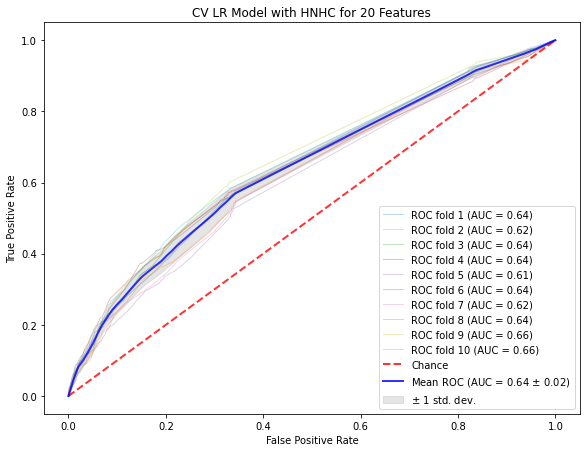

In [33]:
# Subfolder where plots/charts will be saved.
PATH_SUB = f'{images_folder}/{num_features}_features'

# If the folder already exists, pass through. If the folder does not exist, create the folder.
if path.exists(PATH_SUB):
    # Pass through.
    pass
else:
    # Create a folder to save plots/charts in. 
    os.makedirs(f'{images_folder}/{num_features}_features')

# Cross validated ROC/AUC chart, run classifier with cross-validation and plot ROC curves.
cv = StratifiedKFold(n_splits=10)
draw_cv_auc_roc(model_lr_hnhc, cv, cleaned_data_wo_outcome_df_lr_hnhc, target_srs_lr_hnhc, num_features, f'CV LR Model with HNHC for {num_features} Features')

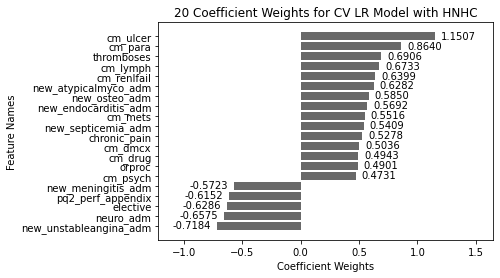

In [34]:
# Grab the coefficient weights using the Logistic Regression model.
for value in model_lr_hnhc.coef_:
    importance_lr_hnhc = sorted(zip(value, X_train_lr_hnhc))

# Graph coefficient weights for Logistic Regression.
value_labels_lr_hnhc = [x[0] for x in importance_lr_hnhc]
feature_names_lr_hnhc = [y[1] for y in importance_lr_hnhc]
plt.barh(feature_names_lr_hnhc, value_labels_lr_hnhc, color='dimgray')
for index, value in enumerate(value_labels_lr_hnhc):
    if value_labels_lr_hnhc[index] >= 0:
        plt.text(value/value_labels_lr_hnhc[index]+value-0.95, index-0.25, str(f'{value:.4f}'), color='black')
    elif value_labels_lr_hnhc[index] < 0:
        plt.text(-value/value_labels_lr_hnhc[index]+value+0.62, index-0.25, str(f'{value:.4f}'), color='black')
plt.xlabel('Coefficient Weights')
plt.xlim((min(value_labels_lr_hnhc)-0.5, max(value_labels_lr_hnhc)+0.5))
plt.ylabel('Feature Names')
plt.title(f'{num_features} Coefficient Weights for CV LR Model with HNHC')
plt.savefig(f'{images_folder}\{num_features}_features\CV_LR_HNHC_Coefficient_Weights_{num_features}', dpi=300, bbox_inches = "tight")
plt.show()

## Logistic Regression RFE - HNHC without 'los' <a class="anchor" id="lrhnhcwolos"></a> 

[Return to Table of Contents](#contents)

In [35]:
# Use Recursive Feature Elimination (RFE) to select the most important features with Logistic Regression.
model_lr_hnhc_no_los = LogisticRegression(random_state = 42)
X_hnhc_no_los = cleaned_data_wo_outcome_hnhc_no_los
dataset_hnhc_no_los = cleaned_data_hnhc_no_los

cleaned_data_wo_outcome_df_lr_hnhc_no_los, target_srs_lr_hnhc_no_los = rfe_feature_selection(model_lr_hnhc_no_los, num_features, X_hnhc_no_los, y_hnhc, dataset_hnhc_no_los, target_hnhc, readmission_df)

['severe_IBD_hospitalization' 'cm_dmcx' 'cm_drug' 'cm_liver' 'cm_lymph'
 'cm_para' 'cm_psych' 'cm_renlfail' 'cm_ulcer' 'cm_wghtloss'
 'blood_transfusion' 'thromboses' 'pq1_dm_short' 'pq2_perf_appendix'
 'pq8_chf' 'new_unstableangina_adm' 'new_meningitis_adm'
 'new_atypicalmyco_adm' 'chronic_pain' 'neuro_adm']


       hnhc_patients  severe_IBD_hospitalization  cm_dmcx  cm_drug  cm_liver  \
0                  0                           0        0        0         0   
3                  0                           0        0        0         0   
4                  1                           0        0        0         0   
9                  0                           0        0        0         0   
10                 0                           0        0        0         0   
...              ...                         ...      ...      ...       ...   
94491              0                           0        0        0         0   
94492              0                           

In [36]:
# Initial model with Logistic Regression.
X_train_lr_hnhc_no_los, X_test_lr_hnhc_no_los, y_train_lr_hnhc_no_los, y_test_lr_hnhc_no_los = train_test_split(cleaned_data_wo_outcome_df_lr_hnhc_no_los, target_srs_lr_hnhc_no_los, random_state=42)
model_lr_hnhc_no_los.fit(X_train_lr_hnhc_no_los, y_train_lr_hnhc_no_los)
print(f'Training Score: {model_lr_hnhc_no_los.score(X_train_lr_hnhc_no_los, y_train_lr_hnhc_no_los)}')
print(f'Testing Score: {model_lr_hnhc_no_los.score(X_test_lr_hnhc_no_los, y_test_lr_hnhc_no_los)}')

Training Score: 0.899946555652443
Testing Score: 0.9020335836638258


In [37]:
# K-Fold Validation using Logistic Regression.
scores_lr_hnhc_no_los = cross_validate(model_lr_hnhc_no_los, cleaned_data_wo_outcome_df_lr_hnhc_no_los, target_srs_lr_hnhc_no_los, cv=10, scoring=('roc_auc', 'precision','recall', 'accuracy'), return_train_score=True)
scores_df_lr_hnhc_no_los = pd.DataFrame(scores_lr_hnhc_no_los)
scores_df_lr_hnhc_no_los

fit_time  score_time  test_roc_auc  train_roc_auc  test_precision  \
0  0.188303    0.007012      0.754256       0.757098        0.519231   
1  0.174169    0.007221      0.731811       0.759373        0.405405   
2  0.136797    0.005983      0.747385       0.757800        0.578947   
3  0.184533    0.006981      0.772980       0.754746        0.483871   
4  0.215124    0.006981      0.751730       0.757315        0.457627   
5  0.190317    0.006773      0.766894       0.755634        0.473684   
6  0.186407    0.005983      0.760364       0.756612        0.500000   
7  0.160997    0.007031      0.753458       0.757103        0.590164   
8  0.179413    0.006946      0.751204       0.757358        0.536232   
9  0.171531    0.005983      0.769645       0.755516        0.434783   

   train_precision  test_recall  train_recall  test_accuracy  train_accuracy  
0         0.487896     0.057203      0.061720       0.900865        0.900190  
1         0.503460     0.063559      0.068551       0.897490        0.900588  
2         0.490347     0.070064      0.059821       0.902532        0.900239  
3         0.511905     0.063694      0.060763       0.900211        0.900755  
4         0.500898     0.057325      0.065709       0.899578        0.900497  
5         0.523232     0.057203      0.061013       0.899789        0.901036  
6         0.503006     0.048729      0.059128       0.900422        0.900567  
7         0.506958     0.076271      0.060071       0.902743        0.900661  
8         0.498162     0.078390      0.063840       0.901477        0.900450  
9         0.495671     0.042373      0.053946       0.899156        0.900403

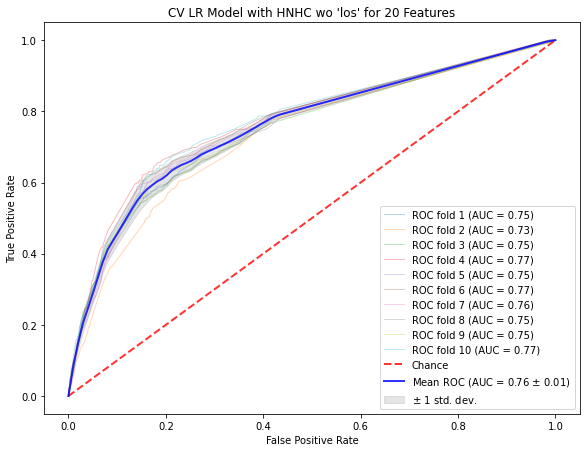

In [38]:
# Cross validated ROC/AUC chart, run classifier with cross-validation and plot ROC curves.
draw_cv_auc_roc(model_lr_hnhc_no_los, cv, cleaned_data_wo_outcome_df_lr_hnhc_no_los, target_srs_lr_hnhc_no_los, num_features, f"CV LR Model with HNHC wo 'los' for {num_features} Features")

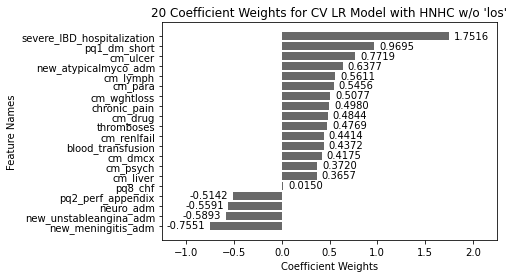

In [39]:
# Grab the coefficient weights using the Logistic Regression model.
for value in model_lr_hnhc_no_los.coef_:
    importance_lr_hnhc_no_los = sorted(zip(value, X_train_lr_hnhc_no_los))

# Graph coefficient weights for Logistic Regression.
value_labels_lr_hnhc_no_los = [x[0] for x in importance_lr_hnhc_no_los]
feature_names_lr_hnhc_no_los = [y[1] for y in importance_lr_hnhc_no_los]
plt.barh(feature_names_lr_hnhc_no_los, value_labels_lr_hnhc_no_los, color='dimgray')
for index, value in enumerate(value_labels_lr_hnhc_no_los):
    if value_labels_lr_hnhc_no_los[index] >= 0:
        plt.text(value/value_labels_lr_hnhc_no_los[index]+value-0.95, index-0.25, str(f'{value:.4f}'), color='black')
    elif value_labels_lr_hnhc_no_los[index] < 0:
        plt.text(-value/value_labels_lr_hnhc_no_los[index]+value+0.55, index-0.25, str(f'{value:.4f}'), color='black')
plt.xlabel('Coefficient Weights')
plt.xlim((min(value_labels_lr_hnhc_no_los)-0.5, max(value_labels_lr_hnhc_no_los)+0.5))
plt.ylabel('Feature Names')
plt.title(f"{num_features} Coefficient Weights for CV LR Model with HNHC w/o 'los'")
plt.savefig(f'{images_folder}\{num_features}_features\CV_LR_HNHC_no_los_Coefficient_Weights_{num_features}', dpi=300, bbox_inches = "tight")
plt.show()

## Decision Tree Classifier RFE - HNHC <a class="anchor" id="dtchnhc"></a> 

[Return to Table of Contents](#contents)

In [40]:
# Use Recursive Feature Elimination (RFE) to select the most important features with Decision Tree Classifier.
model_dtc_hnhc = DecisionTreeClassifier(random_state = 42, splitter = "best", max_depth = 5)

cleaned_data_wo_outcome_df_dtc_hnhc, target_srs_dtc_hnhc = rfe_feature_selection(model_dtc_hnhc, num_features, X_hnhc, y_hnhc, dataset_hnhc, target_hnhc, readmission_df)

['gi_bleed_adm' 'age' 'female' 'los' 'aweekend' 'elective' 'orproc'
 'hosp_urban_rural_location' 'cm_obese' 'cm_psych' 'cm_renlfail'
 'cc_index' 'new_septicemia_adm' 'new_cdiff_adm' 'new_tb_adm'
 'new_atypicalmyco_adm' 'chronic_pain' 'frailty_risk_score' 'h_contrl'
 'hosp_bedsize']


       hnhc_patients  gi_bleed_adm  age  female  los  aweekend  elective  \
0                  0             0   89       0    4         1       0.0   
3                  0             0   48       1    4         0       1.0   
4                  1             0   65       0    5         0       0.0   
9                  0             0   51       0    3         0       0.0   
10                 0             0   22       0    6         0       1.0   
...              ...           ...  ...     ...  ...       ...       ...   
94491              0             0   32       1    3         1       0.0   
94492              0             0   54       0    4         0       1.0   
94493              1           

In [41]:
# Initial model with Decision Tree Classifier.
X_train_dtc_hnhc, X_test_dtc_hnhc, y_train_dtc_hnhc, y_test_dtc_hnhc = train_test_split(cleaned_data_wo_outcome_df_dtc_hnhc, target_srs_dtc_hnhc, random_state=42)
model_dtc_hnhc.fit(X_train_dtc_hnhc, y_train_dtc_hnhc)
print(f'Training Score: {model_dtc_hnhc.score(X_train_dtc_hnhc, y_train_dtc_hnhc)}')
print(f'Testing Score: {model_dtc_hnhc.score(X_test_dtc_hnhc, y_test_dtc_hnhc)}')

Training Score: 0.917504293718501
Testing Score: 0.9189965368696681


In [42]:
# K-Fold Validation using Decision Tree Classifier.
scores_dtc_hnhc = cross_validate(model_dtc_hnhc, cleaned_data_wo_outcome_df_dtc_hnhc, target_srs_dtc_hnhc, cv=10, scoring=('roc_auc', 'precision','recall', 'accuracy'), return_train_score=True)
scores_df_dtc_hnhc = pd.DataFrame(scores_dtc_hnhc)
scores_df_dtc_hnhc

fit_time  score_time  test_roc_auc  train_roc_auc  test_precision  \
0  0.052860    0.007977      0.785162       0.792223        0.836735   
1  0.050864    0.007973      0.772685       0.794006        0.771429   
2  0.046877    0.007979      0.771200       0.793448        0.821138   
3  0.048869    0.006980      0.803311       0.789754        0.788235   
4  0.047871    0.006984      0.780393       0.793239        0.812500   
5  0.047871    0.006981      0.791181       0.790444        0.858333   
6  0.047872    0.007979      0.786473       0.792332        0.873874   
7  0.046875    0.008945      0.770871       0.790225        0.894231   
8  0.048867    0.006984      0.791612       0.791450        0.813333   
9  0.047871    0.006979      0.790589       0.790700        0.738854   

   train_precision  test_recall  train_recall  test_accuracy  train_accuracy  
0         0.886680     0.174098      0.210229       0.914485        0.918700  
1         0.850838     0.171975      0.227198       0.912584        0.919099  
2         0.879024     0.213983      0.212400       0.917019        0.918700  
3         0.762544     0.283898      0.254361       0.921030        0.917902  
4         0.880268     0.192797      0.216643       0.915118        0.919099  
5         0.861842     0.218220      0.216172       0.918497        0.918536  
6         0.868195     0.205945      0.214235       0.918057        0.918538  
7         0.908306     0.197452      0.198444       0.917846        0.918209  
8         0.832330     0.259023      0.228140       0.920380        0.918585  
9         0.809041     0.246285      0.244638       0.916367        0.919054

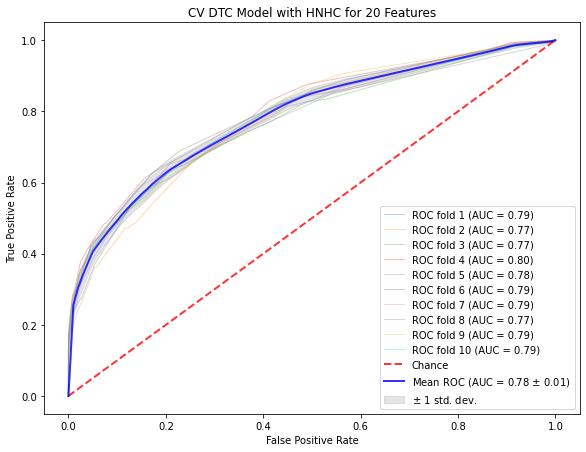

In [43]:
# Cross validated ROC/AUC chart, run classifier with cross-validation and plot ROC curves.
draw_cv_auc_roc(model_dtc_hnhc, cv, cleaned_data_wo_outcome_df_dtc_hnhc, target_srs_dtc_hnhc, num_features, f'CV DTC Model with HNHC for {num_features} Features')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

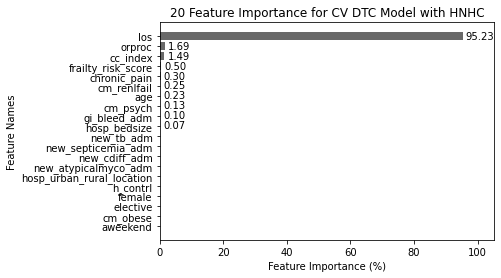

In [44]:
# Grab the feature importance using the cross validation Decision Tree Classifier model.
importance_dtc_hnhc = sorted(zip(model_dtc_hnhc.feature_importances_*100, X_train_dtc_hnhc))

# Graph feature importance for Decision Tree Classifier.
value_labels_dtc_hnhc = [x[0] for x in importance_dtc_hnhc]
feature_names_dtc_hnhc = [y[1] for y in importance_dtc_hnhc]
plt.barh(feature_names_dtc_hnhc, value_labels_dtc_hnhc, color='dimgray')
for index, value in enumerate(value_labels_dtc_hnhc):
    plt.text(value/value_labels_dtc_hnhc[index]+value, index-0.25, str(f'{value:.2f}'), color='black')
plt.xlabel('Feature Importance (%)')
plt.xlim((0, max(value_labels_dtc_hnhc)+10))
plt.ylabel('Feature Names')
plt.title(f'{num_features} Feature Importance for CV DTC Model with HNHC')
plt.savefig(f'{images_folder}\{num_features}_features\CV_DTC_HNHC_Feature_Importance_{num_features}', dpi=300, bbox_inches = "tight")
plt.show()

## Decision Tree Classifier RFE - HNHC without 'los' <a class="anchor" id="dtchnhcwolos"></a> 

[Return to Table of Contents](#contents)

In [45]:
# Use Recursive Feature Elimination (RFE) to select the most important features with Decision Tree Classifier.
model_dtc_hnhc_no_los = DecisionTreeClassifier(random_state = 42, splitter = "best", max_depth = 5)

cleaned_data_wo_outcome_df_dtc_hnhc_no_los, target_srs_dtc_hnhc_no_los = rfe_feature_selection(model_dtc_hnhc_no_los, num_features, X_hnhc_no_los, y_hnhc, dataset_hnhc_no_los, target_hnhc, readmission_df)

['abd_pain_adm' 'age' 'female' 'orproc' 'payer'
 'severe_IBD_hospitalization' 'cm_drug' 'cm_wghtloss' 'blood_transfusion'
 'cc_index' 'thromboses' 'pq5_copd_asthma' 'pq8_chf' 'pq16_dm_amputate'
 'new_arrhythmia_adm' 'new_osteo_adm' 'new_cdiff_adm' 'chronic_pain'
 'ibd_surgery_adm' 'frailty_risk_score']


       hnhc_patients  abd_pain_adm  age  female  orproc  payer  \
0                  0             0   89       0       0    1.0   
3                  0             0   48       1       1    2.0   
4                  1             0   65       0       0    1.0   
9                  0             0   51       0       1    2.0   
10                 0             0   22       0       1    1.0   
...              ...           ...  ...     ...     ...    ...   
94491              0             0   32       1       0    2.0   
94492              0             0   54       0       1    2.0   
94493              1             0   44       0       1    2.0   
94496              0             0

In [46]:
# Initial model with Decision Tree Classifier.
X_train_dtc_hnhc_no_los, X_test_dtc_hnhc_no_los, y_train_dtc_hnhc_no_los, y_test_dtc_hnhc_no_los = train_test_split(cleaned_data_wo_outcome_df_dtc_hnhc_no_los, target_srs_dtc_hnhc_no_los, random_state=42)
model_dtc_hnhc_no_los.fit(X_train_dtc_hnhc_no_los, y_train_dtc_hnhc_no_los)
print(f'Training Score: {model_dtc_hnhc_no_los.score(X_train_dtc_hnhc_no_los, y_train_dtc_hnhc_no_los)}')
print(f'Testing Score: {model_dtc_hnhc_no_los.score(X_test_dtc_hnhc_no_los, y_test_dtc_hnhc_no_los)}')

Training Score: 0.9016642730421559
Testing Score: 0.904629160331137


In [47]:
# K-Fold Validation using Decision Tree Classifier.
scores_dtc_hnhc_no_los = cross_validate(model_dtc_hnhc_no_los, cleaned_data_wo_outcome_df_dtc_hnhc_no_los, target_srs_dtc_hnhc_no_los, cv=10, scoring=('roc_auc', 'precision','recall', 'accuracy'), return_train_score=True)
scores_df_dtc_hnhc_no_los = pd.DataFrame(scores_dtc_hnhc_no_los)
scores_df_dtc_hnhc_no_los

fit_time  score_time  test_roc_auc  train_roc_auc  test_precision  \
0  0.046873    0.007979      0.763719       0.776688        0.500000   
1  0.042885    0.006982      0.739191       0.777311        0.352113   
2  0.041888    0.006981      0.768512       0.775677        0.543689   
3  0.041888    0.006981      0.772298       0.775951        0.555556   
4  0.041890    0.006979      0.758271       0.776736        0.656250   
5  0.039893    0.007979      0.790764       0.773156        0.533333   
6  0.040941    0.007958      0.775394       0.775235        0.526882   
7  0.041888    0.006984      0.764705       0.775944        0.593750   
8  0.041887    0.006982      0.762358       0.777023        0.510870   
9  0.041888    0.007013      0.785162       0.774646        0.545455   

   train_precision  test_recall  train_recall  test_accuracy  train_accuracy  
0         0.557672     0.106157      0.124205       0.900528        0.902990  
1         0.584821     0.053079      0.092623       0.896093        0.903107  
2         0.556750     0.118896      0.109828       0.902429        0.902661  
3         0.563003     0.095541      0.098987       0.902429        0.902638  
4         0.572594     0.089172      0.082724       0.904752        0.902520  
5         0.609412     0.050847      0.061056       0.900950        0.902638  
6         0.554455     0.103814      0.105611       0.901373        0.902520  
7         0.558824     0.080508      0.089580       0.902851        0.902333  
8         0.584187     0.099576      0.094059       0.900739        0.903154  
9         0.614458     0.050955      0.048079       0.901352        0.902218

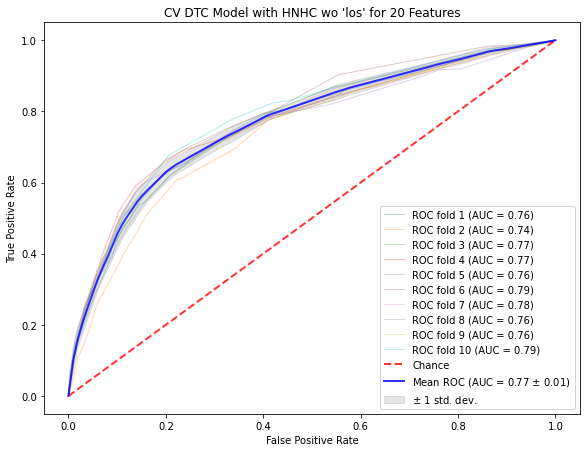

In [48]:
# Cross validated ROC/AUC chart, run classifier with cross-validation and plot ROC curves.
draw_cv_auc_roc(model_dtc_hnhc_no_los, cv, cleaned_data_wo_outcome_df_dtc_hnhc_no_los, target_srs_dtc_hnhc_no_los, num_features, f"CV DTC Model with HNHC wo 'los' for {num_features} Features")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

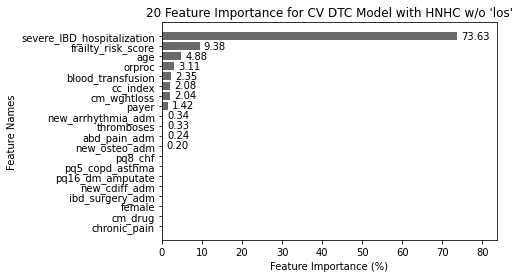

In [49]:
# Grab the feature importance using the cross validation Decision Tree Classifier model.
importance_dtc_hnhc_no_los = sorted(zip(model_dtc_hnhc_no_los.feature_importances_*100, X_train_dtc_hnhc_no_los))

# Graph feature importance for Decision Tree Classifier.
value_labels_dtc_hnhc_no_los = [x[0] for x in importance_dtc_hnhc_no_los]
feature_names_dtc_hnhc_no_los = [y[1] for y in importance_dtc_hnhc_no_los]
plt.barh(feature_names_dtc_hnhc_no_los, value_labels_dtc_hnhc_no_los, color='dimgray')
for index, value in enumerate(value_labels_dtc_hnhc_no_los):
    plt.text(value/value_labels_dtc_hnhc_no_los[index]+value, index-0.25, str(f'{value:.2f}'), color='black')
plt.xlabel('Feature Importance (%)')
plt.xlim((0, max(value_labels_dtc_hnhc_no_los)+10))
plt.ylabel('Feature Names')
plt.title(f"{num_features} Feature Importance for CV DTC Model with HNHC w/o 'los'")
plt.savefig(f'{images_folder}\{num_features}_features\CV_DTC_HNHC_no_los_Feature_Importance_{num_features}', dpi=300, bbox_inches = "tight")
plt.show()

## XGBoost Classifier RFE - HNHC <a class="anchor" id="xgbchnhc"></a>

[Return to Table of Contents](#contents)

In [50]:
# Use Recursive Feature Elimination (RFE) to select the most important features with XGBClassifier.
model_xgbc_hnhc = XGBClassifier(random_state = 42, verbosity = 0, max_depth = 5)

cleaned_data_wo_outcome_df_xgbc_hnhc, target_srs_xgbc_hnhc = rfe_feature_selection(model_xgbc_hnhc, num_features, X_hnhc, y_hnhc, dataset_hnhc, target_hnhc, readmission_df)

['steroid_use' 'age' 'los' 'elective' 'orproc' 'payer' 'cm_anemdef'
 'cm_dm' 'cm_dmcx' 'cm_drug' 'cm_hypothy' 'cm_neuro' 'cm_psych'
 'cm_renlfail' 'cm_wghtloss' 'cc_index' 'thromboses' 'chronic_pain'
 'h_contrl' 'hosp_urcat4']


       hnhc_patients  steroid_use  age  los  elective  orproc  payer  \
0                  0            0   89    4       0.0       0    1.0   
3                  0            0   48    4       1.0       1    2.0   
4                  1            0   65    5       0.0       0    1.0   
9                  0            0   51    3       0.0       1    2.0   
10                 0            0   22    6       1.0       1    1.0   
...              ...          ...  ...  ...       ...     ...    ...   
94491              0            0   32    3       0.0       0    2.0   
94492              0            0   54    4       1.0       1    2.0   
94493              1            0   44    9       1.0       1    2.0   
94496              0            0   52    2       1

In [51]:
# Initial model with XGBClassifier.
X_train_xgbc_hnhc, X_test_xgbc_hnhc, y_train_xgbc_hnhc, y_test_xgbc_hnhc = train_test_split(cleaned_data_wo_outcome_df_xgbc_hnhc, target_srs_xgbc_hnhc, random_state=42)
model_xgbc_hnhc.fit(X_train_xgbc_hnhc, y_train_xgbc_hnhc)
print(f'Training Score: {model_xgbc_hnhc.score(X_train_xgbc_hnhc, y_train_xgbc_hnhc)}')
print(f'Testing Score: {model_xgbc_hnhc.score(X_test_xgbc_hnhc, y_test_xgbc_hnhc)}')

Training Score: 0.9283197564619331
Testing Score: 0.91298833079655


In [52]:
# K-Fold Validation using XGBClassifier.
scores_xgbc_hnhc = cross_validate(model_xgbc_hnhc, cleaned_data_wo_outcome_df_xgbc_hnhc, target_srs_xgbc_hnhc, cv=10, scoring=('roc_auc', 'precision','recall', 'accuracy'), return_train_score=True)
scores_df_xgbc_hnhc = pd.DataFrame(scores_xgbc_hnhc)
scores_df_xgbc_hnhc

fit_time  score_time  test_roc_auc  train_roc_auc  test_precision  \
0  0.695140    0.021942      0.790969       0.864293        0.750000   
1  0.736031    0.019946      0.784622       0.866130        0.671329   
2  0.685167    0.024933      0.790649       0.863958        0.743421   
3  0.704117    0.021942      0.809389       0.863261        0.772152   
4  0.694143    0.022939      0.784839       0.865346        0.751825   
5  0.688159    0.022938      0.810729       0.861770        0.785714   
6  0.681177    0.023936      0.810885       0.861555        0.758621   
7  0.683172    0.019946      0.803597       0.862143        0.798658   
8  0.739023    0.020944      0.805539       0.861860        0.728324   
9  0.676190    0.020944      0.809770       0.861027        0.724551   

   train_precision  test_recall  train_recall  test_accuracy  train_accuracy  
0         0.880986     0.216561      0.295047       0.914817        0.925820  
1         0.897017     0.203822      0.297877       0.910801        0.926665  
2         0.902963     0.239407      0.287568       0.915874        0.925984  
3         0.889543     0.259023      0.284906       0.918605        0.925258  
4         0.903915     0.218684      0.299528       0.915011        0.927066  
5         0.902245     0.256900      0.293868       0.919027        0.926503  
6         0.896983     0.233546      0.287500       0.916279        0.925751  
7         0.920777     0.252654      0.290566       0.919239        0.926855  
8         0.901532     0.267516      0.291509       0.917125        0.926268  
9         0.899417     0.256900      0.291038       0.916279        0.926150

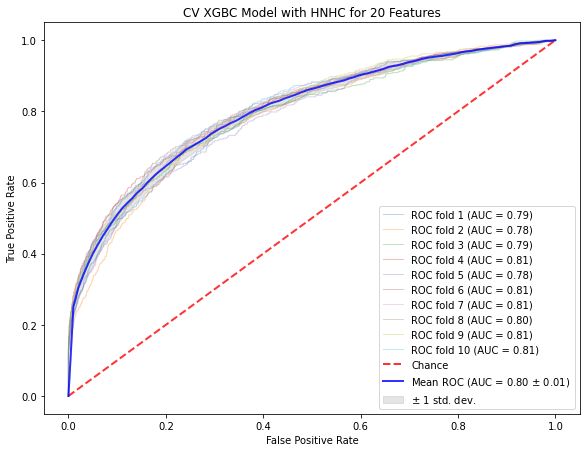

In [53]:
# Cross validated ROC/AUC chart, run classifier with cross-validation and plot ROC curves.
draw_cv_auc_roc(model_xgbc_hnhc, cv, cleaned_data_wo_outcome_df_xgbc_hnhc, target_srs_xgbc_hnhc, num_features, f'CV XGBC Model with HNHC for {num_features} Features')

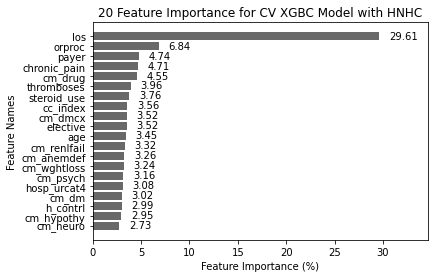

In [54]:
# Grab the feature importance using the cross validation XGBClassifier model.
importance_xgbc_hnhc = sorted(zip(model_xgbc_hnhc.feature_importances_*100, X_train_xgbc_hnhc))

# Graph feature importance for XGBClassifier.
value_labels_xgbc_hnhc = [x[0] for x in importance_xgbc_hnhc]
feature_names_xgbc_hnhc = [y[1] for y in importance_xgbc_hnhc]
plt.barh(feature_names_xgbc_hnhc, value_labels_xgbc_hnhc, color='dimgray')
for index, value in enumerate(value_labels_xgbc_hnhc):
    plt.text(value/value_labels_xgbc_hnhc[index]+value, index-0.25, str(f'{value:.2f}'), color='black')
plt.xlabel('Feature Importance (%)')
plt.xlim((0, max(value_labels_xgbc_hnhc)+5))
plt.ylabel('Feature Names')
plt.title(f'{num_features} Feature Importance for CV XGBC Model with HNHC')
plt.savefig(f'{images_folder}\{num_features}_features\CV_XGBC_HNHC_Feature_Importance_{num_features}', dpi=300, bbox_inches = "tight")
plt.show()

## XGBoost Classifier RFE - HNHC without 'los' <a class="anchor" id="xgbchnhcwolos"></a>

[Return to Table of Contents](#contents)

In [55]:
# Use Recursive Feature Elimination (RFE) to select the most important features with XGBClassifier.
model_xgbc_hnhc_no_los = XGBClassifier(random_state = 42, verbosity = 0, max_depth = 5)

cleaned_data_wo_outcome_df_xgbc_hnhc_no_los, target_srs_xgbc_hnhc_no_los = rfe_feature_selection(model_xgbc_hnhc_no_los, num_features, X_hnhc_no_los, y_hnhc, dataset_hnhc_no_los, target_hnhc, readmission_df)

['steroid_use' 'age' 'elective' 'orproc' 'hosp_urban_rural_location'
 'payer' 'severe_IBD_hospitalization' 'cm_anemdef' 'cm_chf' 'cm_dmcx'
 'cm_drug' 'cm_lymph' 'cm_wghtloss' 'blood_transfusion' 'ibd_procedures'
 'cc_index' 'thromboses' 'new_cdiff_adm' 'chronic_pain' 'hosp_urcat4']


       hnhc_patients  steroid_use  age  elective  orproc  \
0                  0            0   89       0.0       0   
3                  0            0   48       1.0       1   
4                  1            0   65       0.0       0   
9                  0            0   51       0.0       1   
10                 0            0   22       1.0       1   
...              ...          ...  ...       ...     ...   
94491              0            0   32       0.0       0   
94492              0            0   54       1.0       1   
94493              1            0   44       1.0       1   
94496              0            0   52       1.0       1   
94497              0            0   72       0.0       

In [56]:
# Initial model with XGBClassifier.
X_train_xgbc_hnhc_no_los, X_test_xgbc_hnhc_no_los, y_train_xgbc_hnhc_no_los, y_test_xgbc_hnhc_no_los = train_test_split(cleaned_data_wo_outcome_df_xgbc_hnhc_no_los, target_srs_xgbc_hnhc_no_los, random_state=42)
model_xgbc_hnhc_no_los.fit(X_train_xgbc_hnhc_no_los, y_train_xgbc_hnhc_no_los)
print(f'Training Score: {model_xgbc_hnhc_no_los.score(X_train_xgbc_hnhc_no_los, y_train_xgbc_hnhc_no_los)}')
print(f'Testing Score: {model_xgbc_hnhc_no_los.score(X_test_xgbc_hnhc_no_los, y_test_xgbc_hnhc_no_los)}')

Training Score: 0.9145361783690842
Testing Score: 0.8961610011838322


In [57]:
# K-Fold Validation using XGBClassifier.
scores_xgbc_hnhc_no_los = cross_validate(model_xgbc_hnhc_no_los, cleaned_data_wo_outcome_df_xgbc_hnhc_no_los, target_srs_xgbc_hnhc_no_los, cv=10, scoring=('roc_auc', 'precision','recall', 'accuracy'), return_train_score=True)
scores_df_xgbc_hnhc_no_los = pd.DataFrame(scores_xgbc_hnhc_no_los)
scores_df_xgbc_hnhc_no_los

fit_time  score_time  test_roc_auc  train_roc_auc  test_precision  \
0  0.693145    0.022938      0.768365       0.834415        0.509615   
1  0.724063    0.021941      0.752022       0.836898        0.383929   
2  0.696137    0.023936      0.765341       0.834607        0.484211   
3  0.697134    0.024933      0.780553       0.836108        0.532110   
4  0.690153    0.021941      0.760392       0.836909        0.459184   
5  0.688158    0.022938      0.785520       0.834114        0.552083   
6  0.692147    0.022939      0.783125       0.834769        0.448276   
7  0.687162    0.024933      0.767279       0.835811        0.440000   
8  0.692148    0.023936      0.767109       0.834502        0.460177   
9  0.688159    0.022939      0.781680       0.833712        0.539216   

   train_precision  test_recall  train_recall  test_accuracy  train_accuracy  
0         0.776016     0.112527      0.184670       0.900867        0.913488  
1         0.783784     0.091295      0.191509       0.894948        0.914216  
2         0.788747     0.097458      0.175277       0.899598        0.913206  
3         0.775844     0.123142      0.178774       0.901903        0.913067  
4         0.773869     0.095541      0.181604       0.898732        0.913208  
5         0.764767     0.112527      0.174057       0.902537        0.912409  
6         0.763713     0.082803      0.170755       0.898520        0.912151  
7         0.761953     0.093418      0.176651       0.897886        0.912503  
8         0.768603     0.110403      0.177830       0.898520        0.912785  
9         0.764948     0.116773      0.175000       0.902114        0.912480

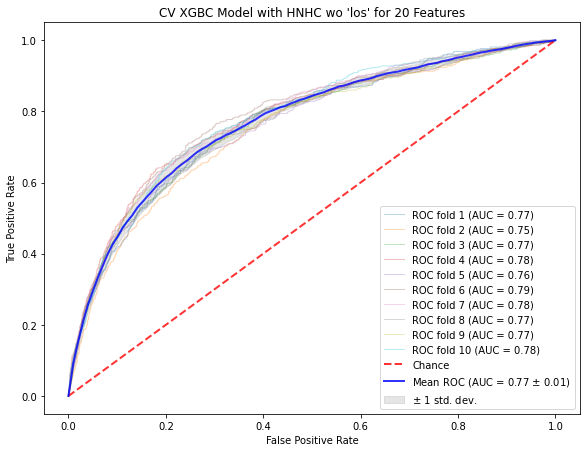

In [58]:
# Cross validated ROC/AUC chart, run classifier with cross-validation and plot ROC curves.
draw_cv_auc_roc(model_xgbc_hnhc_no_los, cv, cleaned_data_wo_outcome_df_xgbc_hnhc_no_los, target_srs_xgbc_hnhc_no_los, num_features, f"CV XGBC Model with HNHC wo 'los' for {num_features} Features")

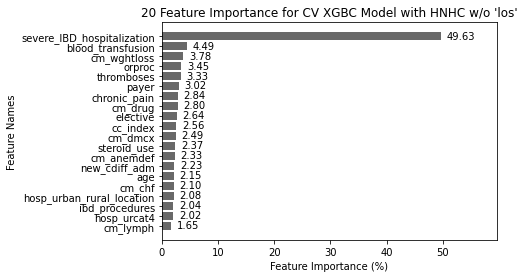

In [59]:
# Grab the feature importance using the cross validation XGBClassifier model.
importance_xgbc_hnhc_no_los = sorted(zip(model_xgbc_hnhc_no_los.feature_importances_*100, X_train_xgbc_hnhc_no_los))

# Graph feature importance for XGBClassifier.
value_labels_xgbc_hnhc_no_los = [x[0] for x in importance_xgbc_hnhc_no_los]
feature_names_xgbc_hnhc_no_los = [y[1] for y in importance_xgbc_hnhc_no_los] 
plt.barh(feature_names_xgbc_hnhc_no_los, value_labels_xgbc_hnhc_no_los, color='dimgray')
for index, value in enumerate(value_labels_xgbc_hnhc_no_los):
    plt.text(value/value_labels_xgbc_hnhc_no_los[index]+value, index-0.25, str(f'{value:.2f}'), color='black')
plt.xlabel('Feature Importance (%)')
plt.xlim((0, max(value_labels_xgbc_hnhc_no_los)+10))
plt.ylabel('Feature Names')
plt.title(f"{num_features} Feature Importance for CV XGBC Model with HNHC w/o 'los'")
plt.savefig(f'{images_folder}\{num_features}_features\CV_XGBC_HNHC_no_los_Feature_Importance_{num_features}', dpi=300, bbox_inches = "tight")
plt.show()

## Target: READM_NINETY_DAYS <a class="anchor" id="ninety"></a> 

[Return to Table of Contents](#contents)

## Logistic Regression RFE - READM_NINETY_DAYS <a class="anchor" id="lrninety"></a> 

[Return to Table of Contents](#contents)

In [60]:
# Use Recursive Feature Elimination (RFE) to select the most important features with Logistic Regression.
model_lr_ninety = LogisticRegression(random_state = 42)
X_ninety = cleaned_data_wo_outcome_ninety
y_ninety = target_ninety
dataset_ninety = cleaned_data_ninety
target_ninety = 'has_90_day_readm'
cleaned_data_wo_outcome_df_lr_ninety, target_srs_lr_ninety = rfe_feature_selection(model_lr_ninety, num_features, X_ninety, y_ninety, dataset_ninety, target_ninety, readmission_df)

['steroid_use' 'abd_pain_adm' 'orproc' 'severe_IBD_hospitalization'
 'cm_dmcx' 'cm_drug' 'cm_lymph' 'cm_mets' 'cm_tumor' 'thromboses'
 'pq2_perf_appendix' 'pq7_htn' 'pq11_bacterialpna' 'pq14_diabeteswocomp'
 'pq16_dm_amputate' 'new_cardiacarrest_adm' 'new_osteo_adm'
 'new_fungal_adm' 'new_pcp_adm' 'chronic_pain']


       has_90_day_readm  steroid_use  abd_pain_adm  orproc  \
0                   0.0            0             0       0   
3                   0.0            0             0       1   
4                   1.0            0             0       0   
9                   0.0            0             0       1   
10                  0.0            0             0       1   
...                 ...          ...           ...     ...   
94491               0.0            0             0       0   
94492               0.0            0             0       1   
94493               1.0            0             0       1   
94496               0.0            0             0       1   
9

In [61]:
# Initial model with Logistic Regression.
X_train_lr_ninety, X_test_lr_ninety, y_train_lr_ninety, y_test_lr_ninety = train_test_split(cleaned_data_wo_outcome_df_lr_ninety, target_srs_lr_ninety, random_state=42)
model_lr_ninety.fit(X_train_lr_ninety, y_train_lr_ninety)
print(f'Training Score: {model_lr_ninety.score(X_train_lr_ninety, y_train_lr_ninety)}')
print(f'Testing Score: {model_lr_ninety.score(X_test_lr_ninety, y_test_lr_ninety)}')

Training Score: 0.6886726111783072
Testing Score: 0.6925997806092313


In [62]:
# K-Fold Validation using Logistic Regression.
scores_lr_ninety = cross_validate(model_lr_ninety, cleaned_data_wo_outcome_df_lr_ninety, target_srs_lr_ninety, cv=10, scoring=('roc_auc', 'precision','recall', 'accuracy'), return_train_score=True)
scores_df_lr_ninety = pd.DataFrame(scores_lr_ninety)
scores_df_lr_ninety

fit_time  score_time  test_roc_auc  train_roc_auc  test_precision  \
0  0.179713    0.007949      0.597625       0.590648        0.438776   
1  0.177697    0.007729      0.597760       0.591001        0.606742   
2  0.163903    0.006980      0.583692       0.592535        0.373333   
3  0.179178    0.006981      0.591800       0.591610        0.437500   
4  0.180031    0.008976      0.582640       0.592692        0.407407   
5  0.175952    0.008010      0.592925       0.591409        0.516854   
6  0.166064    0.007978      0.598253       0.590956        0.465909   
7  0.155172    0.006981      0.590708       0.591363        0.512821   
8  0.187646    0.006981      0.579038       0.593131        0.530435   
9  0.185971    0.008587      0.591213       0.591591        0.415094   

   train_precision  test_recall  train_recall  test_accuracy  train_accuracy  
0         0.493567     0.029312      0.031975       0.688040        0.690373  
1         0.478562     0.036810      0.026216       0.694579        0.689904  
2         0.489917     0.019100      0.031290       0.686709        0.690216  
3         0.506061     0.023874      0.025305       0.688608        0.690802  
4         0.485101     0.030014      0.030836       0.686498        0.690029  
5         0.486766     0.031378      0.032048       0.691350        0.690075  
6         0.493280     0.027967      0.027805       0.689451        0.690380  
7         0.485651     0.040900      0.033338       0.691139        0.690029  
8         0.485936     0.041581      0.037960       0.691983        0.689958  
9         0.493708     0.029993      0.038642       0.686709        0.690333

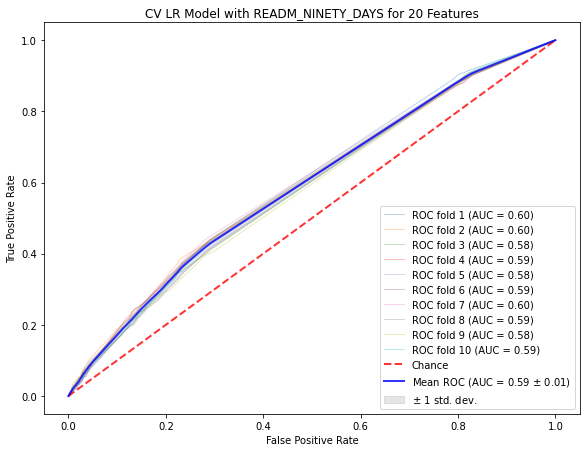

In [63]:
# Cross validated ROC/AUC chart, run classifier with cross-validation and plot ROC curves.
draw_cv_auc_roc(model_lr_ninety, cv, cleaned_data_wo_outcome_df_lr_ninety, target_srs_lr_ninety, num_features, f'CV LR Model with READM_NINETY_DAYS for {num_features} Features')

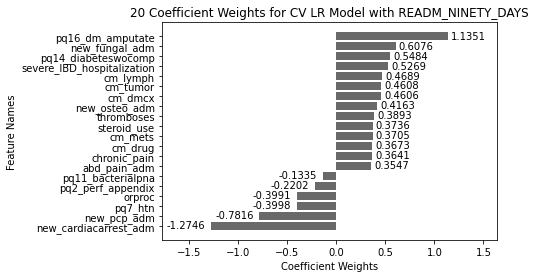

In [64]:
# Grab the coefficient weights using the Logistic Regression model.
for value in model_lr_ninety.coef_:
    importance_lr_ninety = sorted(zip(value, X_train_lr_ninety))

# Graph coefficient weights for Logistic Regression.
value_labels_lr_ninety = [x[0] for x in importance_lr_ninety]
feature_names_lr_ninety = [y[1] for y in importance_lr_ninety]
plt.barh(feature_names_lr_ninety, value_labels_lr_ninety, color='dimgray')
for index, value in enumerate(value_labels_lr_ninety):
    if value_labels_lr_ninety[index] >= 0:
        plt.text(value/value_labels_lr_ninety[index]+value-0.97, index-0.25, str(f'{value:.4f}'), color='black')
    elif value_labels_lr_ninety[index] < 0:
        plt.text(-value/value_labels_lr_ninety[index]+value+0.55, index-0.25, str(f'{value:.4f}'), color='black')
plt.xlabel('Coefficient Weights')
plt.xlim((min(value_labels_lr_ninety)-0.5, max(value_labels_lr_ninety)+0.5))
plt.ylabel('Feature Names')
plt.title(f"{num_features} Coefficient Weights for CV LR Model with READM_NINETY_DAYS")
plt.savefig(f'{images_folder}\{num_features}_features\CV_LR_READM_NINETY_DAYS_Coefficient_Weights_{num_features}', dpi=300, bbox_inches = "tight")
plt.show()

## Decision Tree Classifier RFE - READM_NINETY_DAYS <a class="anchor" id="dtcninety"></a> 

[Return to Table of Contents](#contents)

In [65]:
# Use Recursive Feature Elimination (RFE) to select the most important features with Decision Tree Classifier.
model_dtc_ninety = DecisionTreeClassifier(random_state = 42, splitter = "best", max_depth = 5)

cleaned_data_wo_outcome_df_dtc_ninety, target_srs_dtc_ninety = rfe_feature_selection(model_dtc_ninety, num_features, X_ninety, y_ninety, dataset_ninety, target_ninety, readmission_df)

['steroid_use' 'age' 'los' 'elective' 'orproc' 'payer' 'cm_anemdef'
 'cm_drug' 'cm_mets' 'cm_renlfail' 'ibd_procedures' 'cc_index'
 'pq11_bacterialpna' 'pq12_uti' 'pq13_angina' 'new_mi_adm'
 'new_septicemia_adm' 'frailty_risk_score' 'thrombosis_adm'
 'ibd_specific_adm']


       has_90_day_readm  steroid_use  age  los  elective  orproc  payer  \
0                   0.0            0   89    4       0.0       0    1.0   
3                   0.0            0   48    4       1.0       1    2.0   
4                   1.0            0   65    5       0.0       0    1.0   
9                   0.0            0   51    3       0.0       1    2.0   
10                  0.0            0   22    6       1.0       1    1.0   
...                 ...          ...  ...  ...       ...     ...    ...   
94491               0.0            0   32    3       0.0       0    2.0   
94492               0.0            0   54    4       1.0       1    2.0   
94493               1.0            0   44    9      

In [66]:
# Initial model with Decision Tree Classifier.
X_train_dtc_ninety, X_test_dtc_ninety, y_train_dtc_ninety, y_test_dtc_ninety = train_test_split(cleaned_data_wo_outcome_df_dtc_ninety, target_srs_dtc_ninety, random_state=42)
model_dtc_ninety.fit(X_train_dtc_ninety, y_train_dtc_ninety)
print(f'Training Score: {model_dtc_ninety.score(X_train_dtc_ninety, y_train_dtc_ninety)}')
print(f'Testing Score: {model_dtc_ninety.score(X_test_dtc_ninety, y_test_dtc_ninety)}')

Training Score: 0.6916593849536319
Testing Score: 0.6920345002536783


In [67]:
# K-Fold Validation using Decision Tree Classifier.
scores_dtc_ninety = cross_validate(model_dtc_ninety, cleaned_data_wo_outcome_df_dtc_ninety, target_srs_dtc_ninety, cv=10, scoring=('roc_auc', 'precision','recall', 'accuracy'), return_train_score=True)
scores_df_dtc_ninety = pd.DataFrame(scores_dtc_ninety)
scores_df_dtc_ninety

fit_time  score_time  test_roc_auc  train_roc_auc  test_precision  \
0  0.051870    0.010993      0.621259       0.627921        0.438202   
1  0.046906    0.007948      0.620658       0.627848        0.609756   
2  0.045909    0.007979      0.620415       0.627120        0.518519   
3  0.050896    0.006981      0.625562       0.628137        0.529412   
4  0.045877    0.007979      0.622587       0.627699        0.425926   
5  0.044911    0.008981      0.619743       0.627400        0.421053   
6  0.044911    0.007979      0.611844       0.628528        0.350000   
7  0.044878    0.007975      0.616332       0.628035        0.470199   
8  0.045911    0.006980      0.626953       0.626922        0.400000   
9  0.045878    0.006986      0.610191       0.629836        0.529412   

   train_precision  test_recall  train_recall  test_accuracy  train_accuracy  
0         0.556501     0.026621      0.034752       0.688015        0.692615  
1         0.615120     0.017065      0.013582       0.692243        0.692004  
2         0.636364     0.009556      0.012748       0.690552        0.692122  
3         0.557734     0.018443      0.019423       0.691121        0.691659  
4         0.577540     0.015710      0.024583       0.688795        0.692458  
5         0.660131     0.005464      0.007663       0.689852        0.691565  
6         0.640187     0.004781      0.010395       0.689218        0.691823  
7         0.526559     0.048497      0.051897       0.688584        0.692035  
8         0.633588     0.004098      0.006297       0.689852        0.691236  
9         0.613475     0.018430      0.013127       0.690909        0.691941

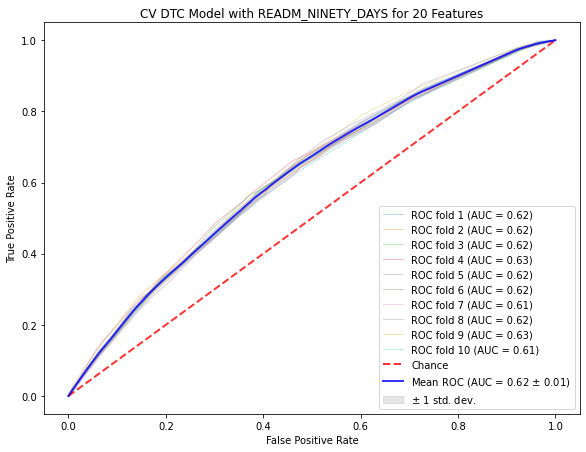

In [68]:
# Cross validated ROC/AUC chart, run classifier with cross-validation and plot ROC curves.
draw_cv_auc_roc(model_dtc_ninety, cv, cleaned_data_wo_outcome_df_dtc_ninety, target_srs_dtc_ninety, num_features, f'CV DTC Model with READM_NINETY_DAYS for {num_features} Features')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

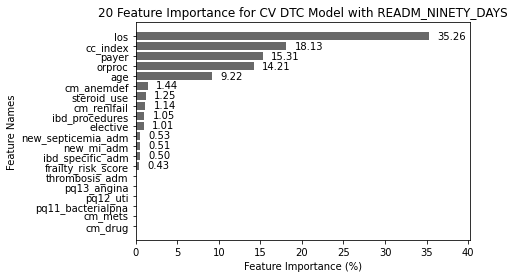

In [69]:
# Grab the feature importance using the cross validation Decision Tree Classifier model.
importance_dtc_ninety = sorted(zip(model_dtc_ninety.feature_importances_*100, X_train_dtc_ninety))

# Graph feature importance for Decision Tree Classifier.
value_labels_dtc_ninety = [x[0] for x in importance_dtc_ninety]
feature_names_dtc_ninety = [y[1] for y in importance_dtc_ninety]
plt.barh(feature_names_dtc_ninety, value_labels_dtc_ninety, color='dimgray')
for index, value in enumerate(value_labels_dtc_ninety):
    plt.text(value/value_labels_dtc_ninety[index]+value, index-0.25, str(f'{value:.2f}'), color='black')
plt.xlabel('Feature Importance (%)')
plt.xlim((0, max(value_labels_dtc_ninety)+5))
plt.ylabel('Feature Names')
plt.title(f"{num_features} Feature Importance for CV DTC Model with READM_NINETY_DAYS")
plt.savefig(f'{images_folder}\{num_features}_features\CV_DTC_READM_NINETY_DAYS_Feature_Importance_{num_features}', dpi=300, bbox_inches = "tight")
plt.show()

## XGBoost Classifier RFE - READM_NINETY_DAYS <a class="anchor" id="xgbcninety"></a> 

[Return to Table of Contents](#contents)

In [70]:
# Use Recursive Feature Elimination (RFE) to select the most important features with XGBClassifier.
model_xgbc_ninety = XGBClassifier(random_state = 42, verbosity = 0, max_depth = 5)
 
cleaned_data_wo_outcome_df_xgbc_ninety, target_srs_xgbc_ninety = rfe_feature_selection(model_xgbc_ninety, num_features, X_ninety, y_ninety, dataset_ninety, target_ninety, readmission_df)

['steroid_use' 'abd_pain_adm' 'age' 'los' 'elective' 'orproc'
 'hosp_urban_rural_location' 'payer' 'cm_anemdef' 'cm_depress' 'cm_dmcx'
 'cm_drug' 'cm_neuro' 'cm_wghtloss' 'ibd_procedures' 'cc_index'
 'thromboses' 'new_septicemia_adm' 'chronic_pain' 'ibd_specific_adm']


       has_90_day_readm  steroid_use  abd_pain_adm  age  los  elective  \
0                   0.0            0             0   89    4       0.0   
3                   0.0            0             0   48    4       1.0   
4                   1.0            0             0   65    5       0.0   
9                   0.0            0             0   51    3       0.0   
10                  0.0            0             0   22    6       1.0   
...                 ...          ...           ...  ...  ...       ...   
94491               0.0            0             0   32    3       0.0   
94492               0.0            0             0   54    4       1.0   
94493               1.0            0             0   44    9   

In [71]:
# Initial model with XGBClassifier.
X_train_xgbc_ninety, X_test_xgbc_ninety, y_train_xgbc_ninety, y_test_xgbc_ninety = train_test_split(cleaned_data_wo_outcome_df_xgbc_ninety, target_srs_xgbc_ninety, random_state=42)
model_xgbc_ninety.fit(X_train_xgbc_ninety, y_train_xgbc_ninety)
print(f'Training Score: {model_xgbc_ninety.score(X_train_xgbc_ninety, y_train_xgbc_ninety)}')
print(f'Testing Score: {model_xgbc_ninety.score(X_test_xgbc_ninety, y_test_xgbc_ninety)}')

Training Score: 0.7266961693491558
Testing Score: 0.6889058007779469


In [72]:
# K-Fold Validation using XGBClassifier.
scores_xgbc_ninety = cross_validate(model_xgbc_ninety, cleaned_data_wo_outcome_df_xgbc_ninety, target_srs_xgbc_ninety, cv=10, scoring=('roc_auc', 'precision','recall', 'accuracy'), return_train_score=True)
scores_df_xgbc_ninety = pd.DataFrame(scores_xgbc_ninety)
scores_df_xgbc_ninety

fit_time  score_time  test_roc_auc  train_roc_auc  test_precision  \
0  0.791881    0.022938      0.633980       0.708889        0.497191   
1  0.844740    0.023937      0.636329       0.711382        0.482094   
2  0.826788    0.024934      0.632904       0.711963        0.433168   
3  0.799860    0.022938      0.641119       0.710804        0.476190   
4  0.850724    0.020944      0.633827       0.709723        0.460705   
5  0.834767    0.027925      0.644096       0.712022        0.512329   
6  0.826788    0.022938      0.627174       0.712662        0.478754   
7  0.833769    0.022939      0.638719       0.709626        0.423295   
8  0.758970    0.021941      0.641596       0.708890        0.473404   
9  0.768943    0.026927      0.622315       0.709074        0.494595   

   train_precision  test_recall  train_recall  test_accuracy  train_accuracy  
0         0.704319     0.120819      0.176948       0.689918        0.722212  
1         0.715886     0.119454      0.184308       0.687592        0.724843  
2         0.721850     0.119454      0.188254       0.678926        0.726252  
3         0.712868     0.122951      0.179894       0.686681        0.723675  
4         0.700513     0.116120      0.186343       0.684355        0.723440  
5         0.713270     0.127732      0.182701       0.692389        0.724238  
6         0.719753     0.115437      0.185508       0.687315        0.725483  
7         0.709392     0.101776      0.182246       0.679070        0.723722  
8         0.705606     0.121585      0.182398       0.686258        0.723322  
9         0.699075     0.124915      0.177859       0.689429        0.721796

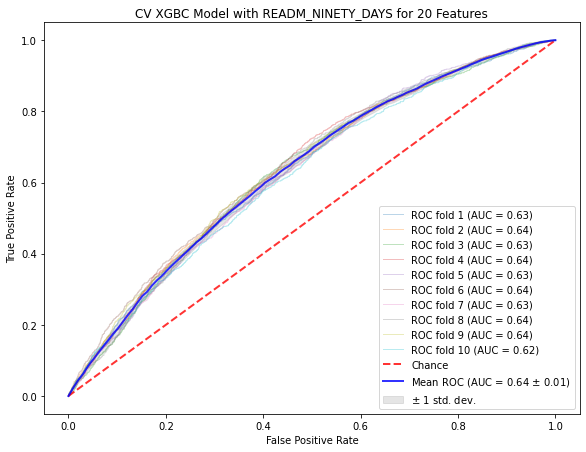

In [73]:
# Cross validated ROC/AUC chart, run classifier with cross-validation and plot ROC curves.
draw_cv_auc_roc(model_xgbc_ninety, cv, cleaned_data_wo_outcome_df_xgbc_ninety, target_srs_xgbc_ninety, num_features, f'CV XGBC Model with READM_NINETY_DAYS for {num_features} Features')

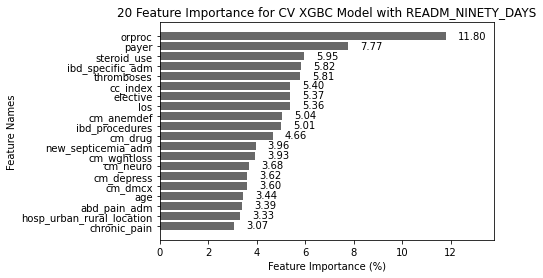

In [74]:
# Grab the feature importance using the cross validation XGBClassifier model.
importance_xgbc_ninety = sorted(zip(model_xgbc_ninety.feature_importances_*100, X_train_xgbc_ninety))

# Graph feature importance for XGBClassifier.
value_labels_xgbc_ninety = [x[0] for x in importance_xgbc_ninety]
feature_names_xgbc_ninety = [y[1] for y in importance_xgbc_ninety]
plt.barh(feature_names_xgbc_ninety, value_labels_xgbc_ninety, color='dimgray')
for index, value in enumerate(value_labels_xgbc_ninety):
    plt.text(value/value_labels_xgbc_ninety[index]+value-0.5, index-0.25, str(f'{value:.2f}'), color='black')
plt.xlabel('Feature Importance (%)')
plt.xlim((0, max(value_labels_xgbc_ninety)+2))
plt.ylabel('Feature Names')
plt.title(f"{num_features} Feature Importance for CV XGBC Model with READM_NINETY_DAYS")
plt.savefig(f'{images_folder}\{num_features}_features\CV_XGBC_READM_NINETY_DAYS_Feature_Importance_{num_features}', dpi=300, bbox_inches = "tight")
plt.show()